In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2008
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2008-03-01 to 2008-05-31
Columns: 268 entries, 10000009 to 25000592
dtypes: float64(268)
memory usage: 193.3 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-03-01  2.290857  1.339235  2.750760  1.424066  2.155672  1.480315   
2008-03-02  1.899684  1.413953  2.438228  1.170864  1.882047  1.324609   
2008-03-03  1.751739  1.470026  2.078168  1.075121  1.495923  2.102492   
2008-03-04  1.849327  1.463817  2.056943  1.065721  1.580120  2.189262   
2008-03-05  1.400725  1.407848  1.845849  0.894271  1.241184  1.448708   
...              ...       ...       ...       ...       ...       ...   
2008-05-27  0.588348  0.557594  0.659366  0.330037  0.544731  0.814597   
2008-05-28  0.580378  0.542019  0.646469  0.328692  0.539787  0.809011   
2008-05-29  0.572015  0.524877  0.623382  0.322555  0.530886  0.776422   
2008-05-30  0.570547  0.517566  0.614952  0.318465  0.527229  0.801848   
2008-05-31  0.574276  0.502090  0.592376  0.315332  0.521401  0.780294   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-03-01  1.566303  0.960818  

          2008-03-01  2008-03-02  2008-03-03  2008-03-04  2008-03-05  \
10000009   -0.028630   -0.045096   -0.044176   -0.034343   -0.053381   
11000011   -0.094679   -0.079085   -0.063916   -0.061389   -0.052879   
11000016    0.003290   -0.007411   -0.021303   -0.019778   -0.021997   
13000011   -0.088791   -0.096095   -0.091588   -0.089318   -0.089089   
13000019   -0.038013   -0.046330   -0.062101   -0.053230   -0.064629   
...              ...         ...         ...         ...         ...   
7000003    -0.103831   -0.090140   -0.098453   -0.104308   -0.097574   
8000001    -0.090451   -0.073910   -0.080624   -0.086634   -0.080251   
9000001     0.020538    0.020118    0.067855    0.046169    0.006729   
9000015     0.008432    0.008918    0.053523    0.033946   -0.001059   
25000592   -0.096910   -0.103812   -0.092914   -0.091505   -0.087525   

          2008-03-06  2008-03-07  2008-03-08  2008-03-09  2008-03-10  ...  \
10000009   -0.028966   -0.023038   -0.038654   -0.034605  

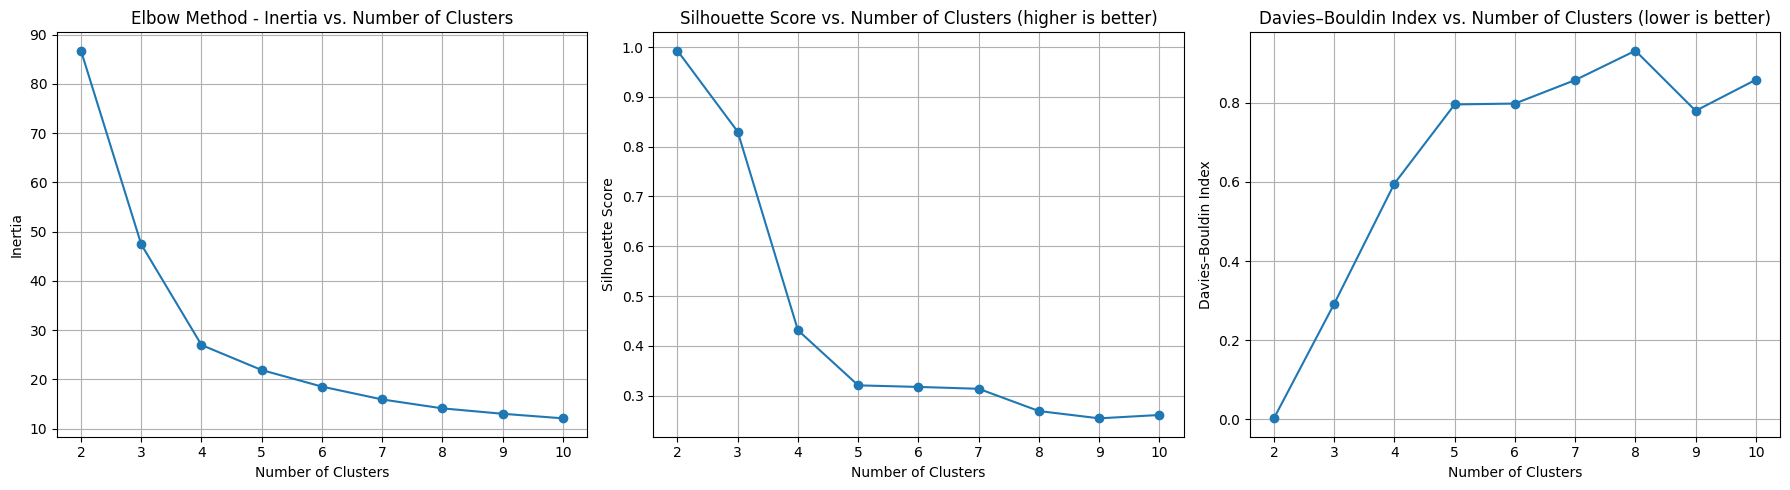

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-03-01  2.290857  1.339235  2.750760  1.424066  2.155672  1.480315   
2008-03-02  1.899684  1.413953  2.438228  1.170864  1.882047  1.324609   
2008-03-03  1.751739  1.470026  2.078168  1.075121  1.495923  2.102492   
2008-03-04  1.849327  1.463817  2.056943  1.065721  1.580120  2.189262   
2008-03-05  1.400725  1.407848  1.845849  0.894271  1.241184  1.448708   
...              ...       ...       ...       ...       ...       ...   
2008-05-27  0.588348  0.557594  0.659366  0.330037  0.544731  0.814597   
2008-05-28  0.580378  0.542019  0.646469  0.328692  0.539787  0.809011   
2008-05-29  0.572015  0.524877  0.623382  0.322555  0.530886  0.776422   
2008-05-30  0.570547  0.517566  0.614952  0.318465  0.527229  0.801848   
2008-05-31  0.574276  0.502090  0.592376  0.315332  0.521401  0.780294   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-03-01  1.566303  0.960818  

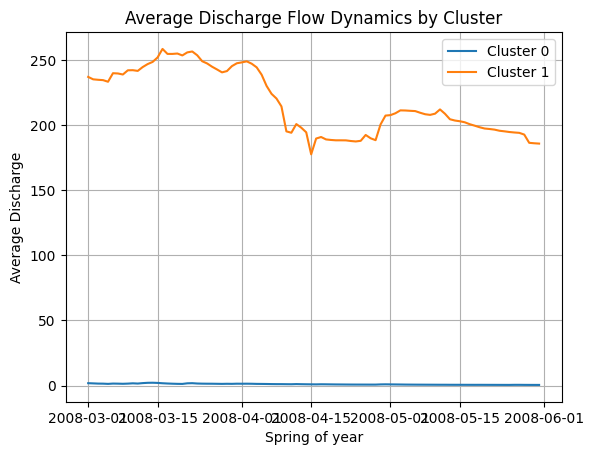

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2008-03-01  2.290857  1.339235  2.750760  1.424066  2.155672  1.480315   
2008-03-02  1.899684  1.413953  2.438228  1.170864  1.882047  1.324609   
2008-03-03  1.751739  1.470026  2.078168  1.075121  1.495923  2.102492   
2008-03-04  1.849327  1.463817  2.056943  1.065721  1.580120  2.189262   
2008-03-05  1.400725  1.407848  1.845849  0.894271  1.241184  1.448708   
...              ...       ...       ...       ...       ...       ...   
2008-05-27  0.588348  0.557594  0.659366  0.330037  0.544731  0.814597   
2008-05-28  0.580378  0.542019  0.646469  0.328692  0.539787  0.809011   
2008-05-29  0.572015  0.524877  0.623382  0.322555  0.530886  0.776422   
2008-05-30  0.570547  0.517566  0.614952  0.318465  0.527229  0.801848   
2008-05-31  0.574276  0.502090  0.592376  0.315332  0.521401  0.780294   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-03-01  1.566303  0.960818  1.657292  1.050237  ...  0.561133  0.891968   
2008-03-02  1.602936  0.895469  1.509667  1.017644  ...  0.678371  0.870950   
2008-03-03  1.281643  0.783322  1.261645  0.997057  ...  0.450560  0.800279   
2008-03-04  1.446046  0.814316  1.321693  1.191562  ...  0.509290  1.116097   
2008-03-05  1.329407  0.761227  1.200974  0.889226  ...  0.485961  1.404520   
...              ...       ...       ...       ...  ...       ...       ...   
2008-05-27  0.805573  0.587319  0.916665  0.650501  ...  0.095079  0.269380   
2008-05-28  0.791327  0.577000  0.911106  0.634550  ...  0.070240  0.259799   
2008-05-29  0.778332  0.568589  0.906923  0.615248  ...  0.059385  0.178107   
2008-05-30  0.772655  0.564796  0.905706  0.609988  ...  0.054497  0.164397   
2008-05-31  0.769890  0.556381  0.903614  0.598704  ...  0.049951  0.138029   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2008-03-01  0.347155  2.061341  0.732068  1.207372  1.400149  2.999269   
2008-03-02  0.328061  1.455720  0.744690  1.255960  1.487906  2.831631   
2008-03-03  0.273185  1.106818  0.593227  0.977136  1.231580  3.350560   
2008-03-04  0.585864  1.838362  1.173833  0.852065  1.103989  2.996930   
2008-03-05  0.600990  1.803277  1.199076  0.773924  1.019615  2.253259   
...              ...       ...       ...       ...       ...       ...   
2008-05-27  0.276363  0.265779  0.214572  0.198692  0.272002  1.114518   
2008-05-28  0.216130  0.372091  0.195639  0.194221  0.265493  1.104621   
2008-05-29  0.133394  0.230342  0.132529  0.189759  0.288710  1.142829   
2008-05-30  0.124297  0.194905  0.126219  0.186997  0.296222  1.112577   
2008-05-31  0.115199  0.106312  0.119908  0.181929  0.292509  1.095767   

             9000015  25000592  
2008-03-01  2.824848  1.307087  
2008-03-02  2.671584  1.060588  
2008-03-03  3.146017  1.056191  
2008-03-04  2.822710  1.034550  
2008-03-05  2.142806  0.916453  
...              ...       ...  
2008-05-27  1.101708  1.480509  
2008-05-28  1.092659  1.477153  
2008-05-29  1.127591  1.475728  
2008-05-30  1.099933  1.490129  
2008-05-31  1.084564  1.500468  

[92 rows x 268 columns]

<Axes: >

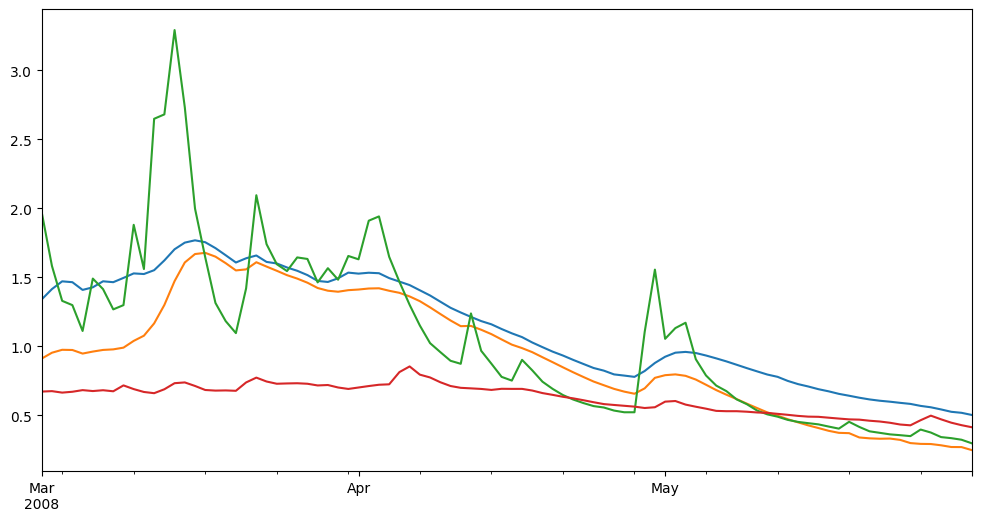

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

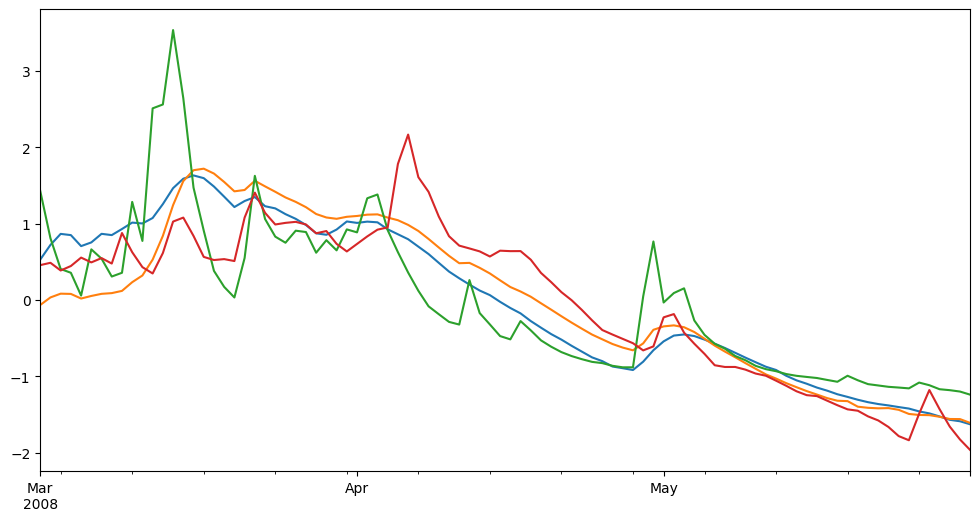

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

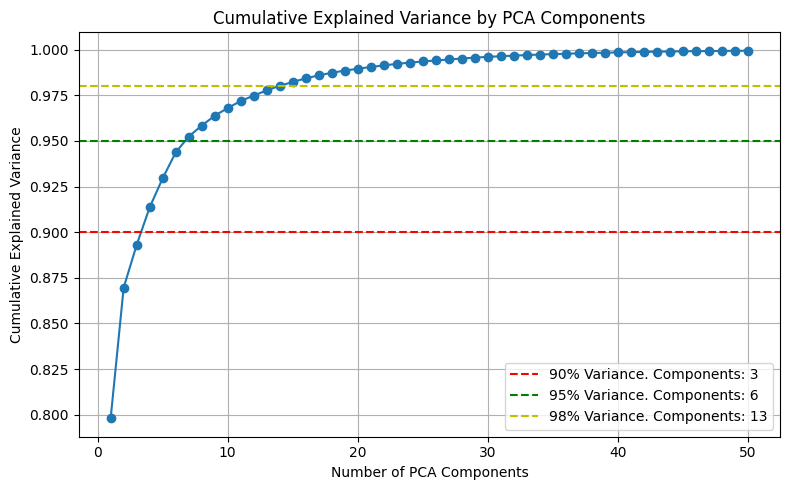

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 2.39784498e+01,  1.32478514e+01,  2.57513341e+00, ...,
        -1.36809459e+00,  1.63735584e-01,  1.02916619e+00],
       [ 1.86479810e+01,  7.58903720e+00, -2.32885650e+00, ...,
         1.33245209e+00,  1.05126393e-02, -1.07673828e+00],
       [ 1.34065889e+01,  5.60374536e+00, -2.42655473e+00, ...,
         4.28593955e-01,  1.68227113e-01,  5.99716834e-01],
       ...,
       [-1.94363854e+01,  2.13006819e+00, -2.61347086e+00, ...,
        -2.50263213e-01,  2.80264234e-01,  1.56074252e-02],
       [-1.99417777e+01,  2.32070596e+00, -2.60008096e+00, ...,
        -2.21292105e-01,  1.73452704e-01,  3.87322038e-02],
       [-2.03481082e+01,  2.47838967e+00, -2.53274886e+00, ...,
        -2.83617528e-01,  1.94387576e-01,  3.17179971e-02]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


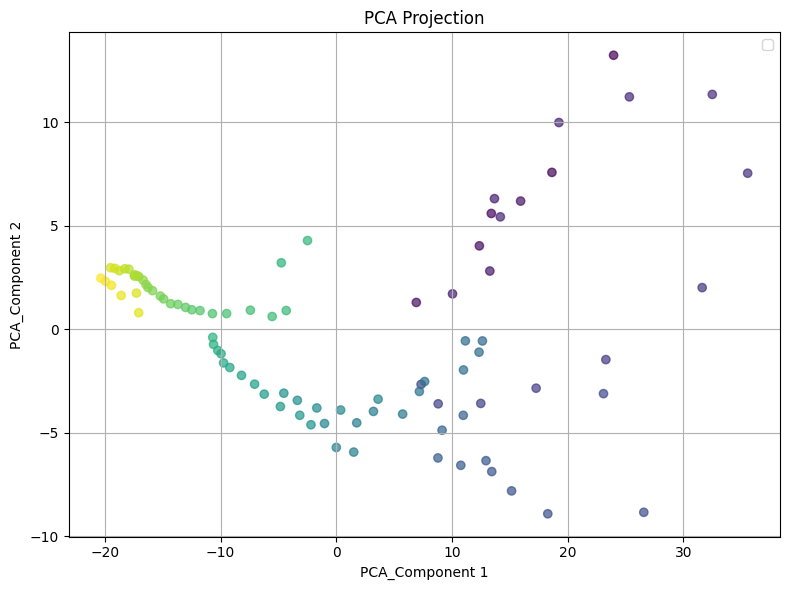

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


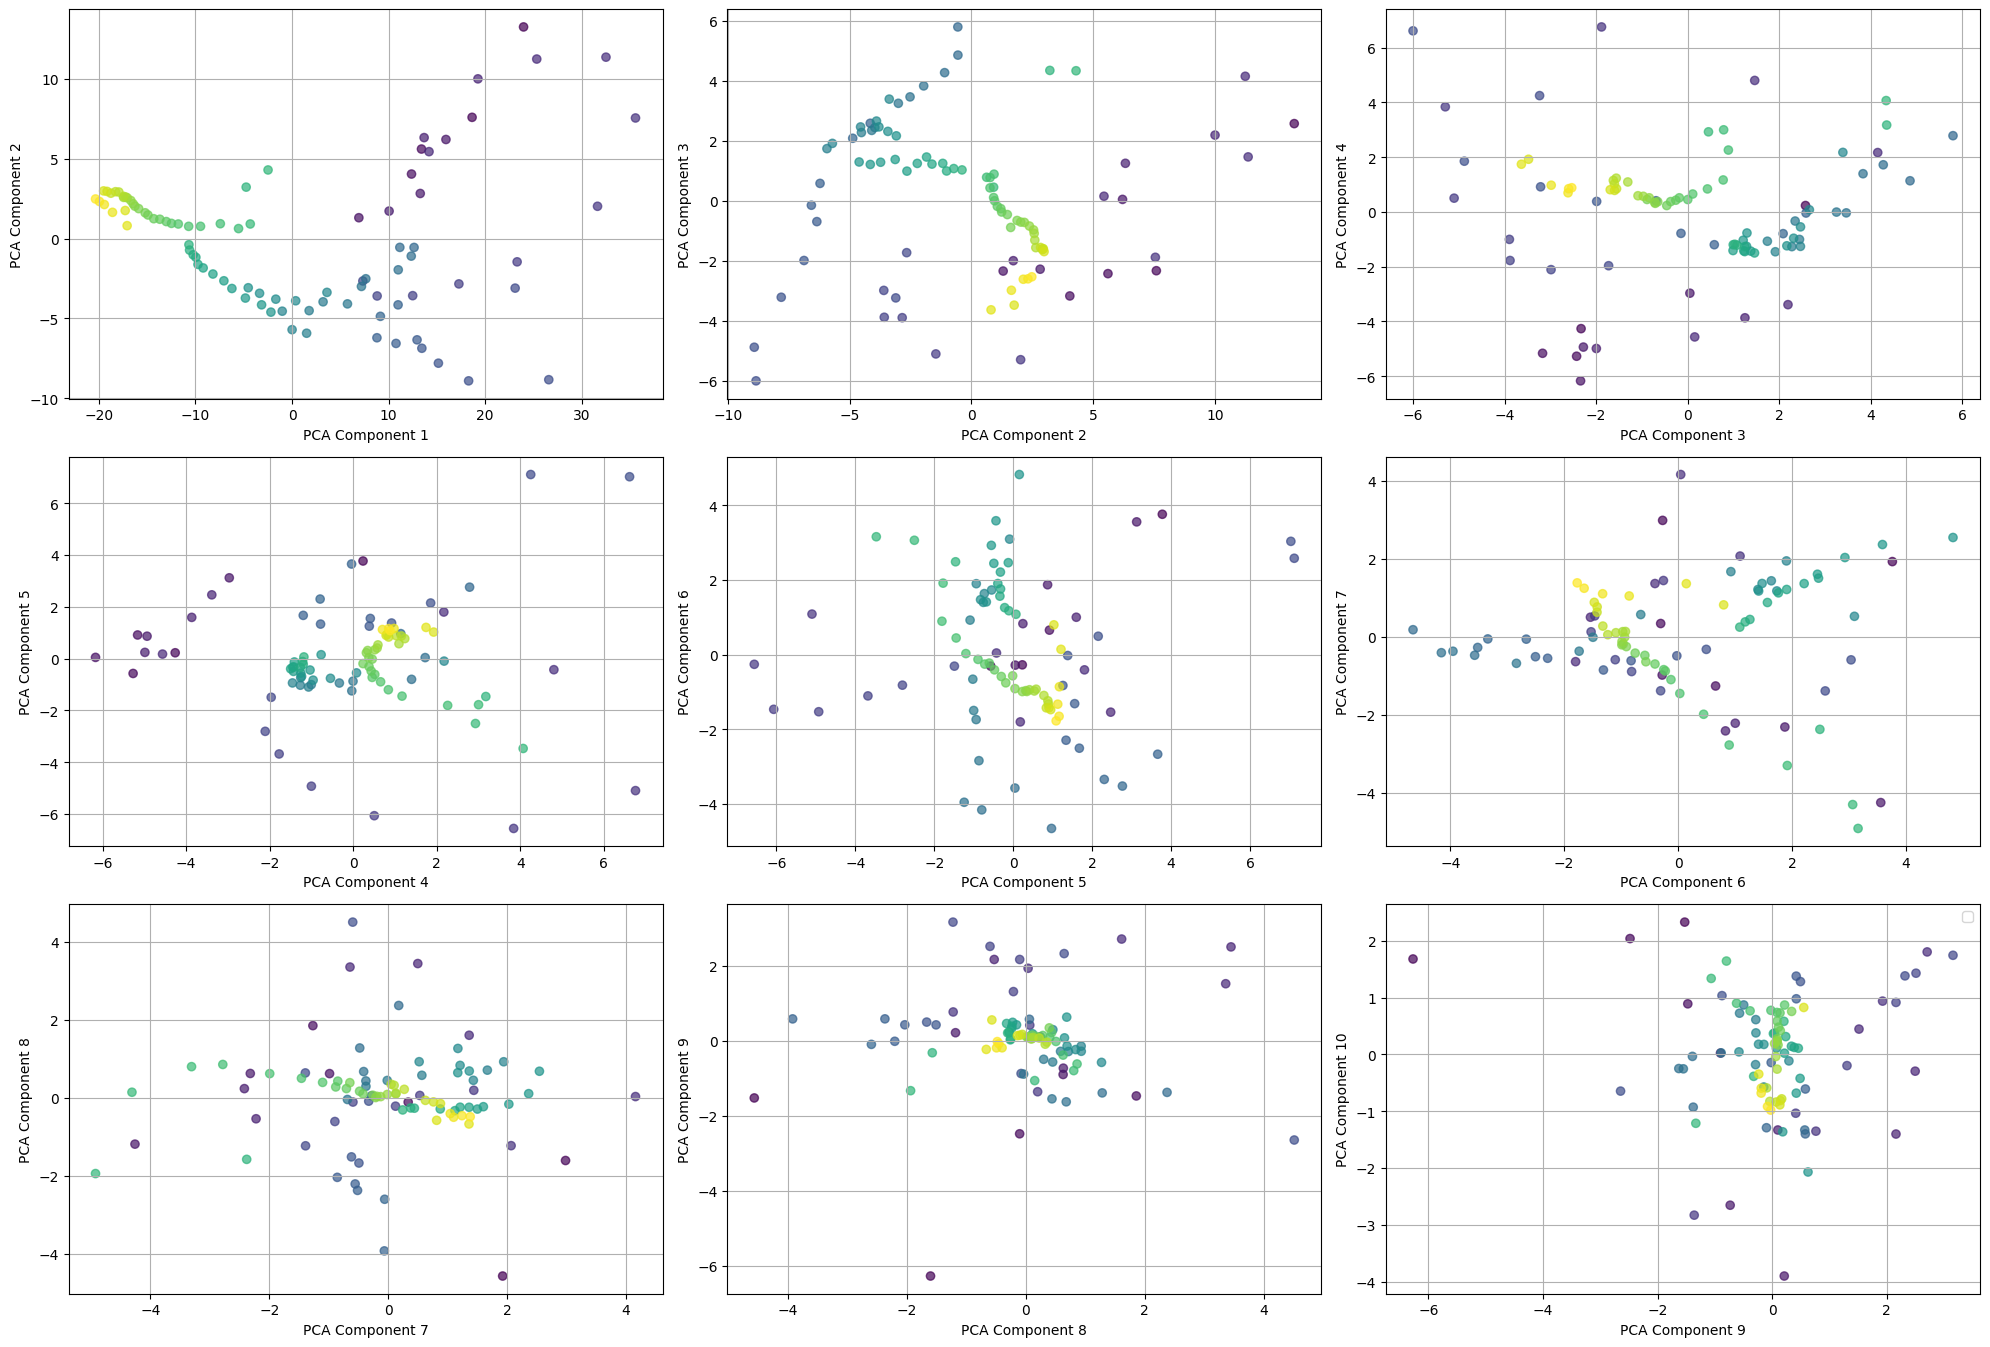

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.413
KMeans Davies-Bouldin Index is 0.992


<Axes: xlabel='k'>

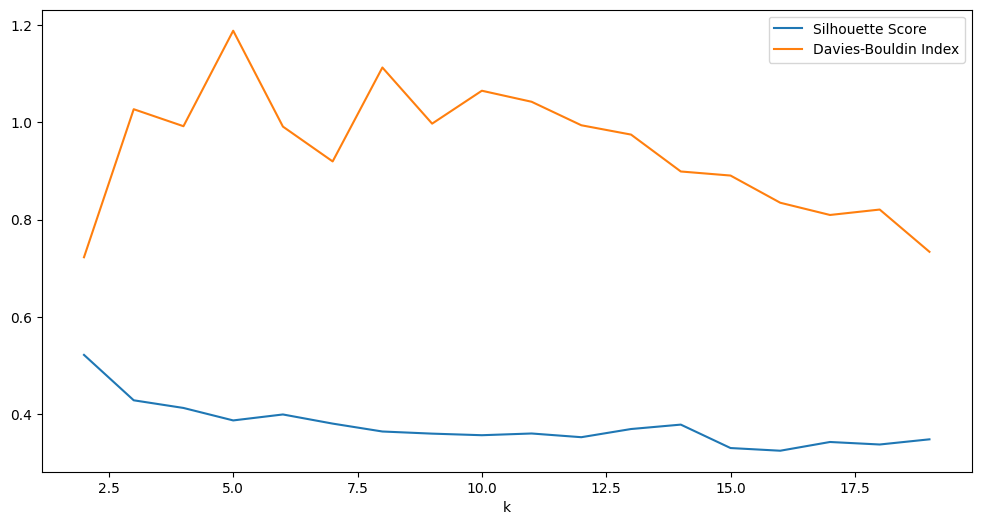

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         4     77          0.027679   
2    1.01            3         5     66          0.097258   
3    1.27            3         3     65          0.086386   
4    1.52            3         3     60          0.128083   
5    1.78            3         2     58          0.219446   
6    2.03            3         3     55          0.133518   
7    2.29            3         3     55          0.133518   
8    2.54            3         5     48          0.158634   
9    2.80            3         5     39          0.139055   
10   3.05            3         5     35          0.179115   
11   3.31            3         4     33          0.213922   
12   3.56            3         5     30          0.216231   
13   3.82            3         5     30          0.216231   
14   4.07            3         4     28          0.254474   
15   4.33            3         3     25          0.200454   
16   4.58            3         3     24          0.201326   
17   4.84            3         3     22          0.217038   
18   5.09            3         3     22          0.217038   
19   5.35            3         4     19          0.216372   
20   5.60            3         4     18          0.209297   
21   5.86            3         4     17          0.232731   
22   6.11            3         4     17          0.232731   
23   6.37            3         4     17          0.232731   
24   6.62            3         4     17          0.232731   
25   6.88            3         4     16          0.236664   
26   7.13            3         3     14          0.181079   
27   7.39            3         2     10          0.210859   
28   7.64            3         2      9          0.232153   
29   7.90            3         2      9          0.232153   
30   8.15            3         1      9               NaN   
31   8.41            3         1      8               NaN   
32   8.66            3         1      8               NaN   
33   8.92            3         1      8               NaN   
34   9.17            3         1      7               NaN   
35   9.43            3         1      7               NaN   
36   9.68            3         1      7               NaN   
37   9.94            3         2      3          0.371228   
38  10.19            3         2      3          0.371228   
39  10.45            3         1      3               NaN   
40  10.70            3         1      2               NaN   
41  10.96            3         1      2               NaN   
42  11.21            3         1      2               NaN   
43  11.47            3         1      2               NaN   
44  11.72            3         1      2               NaN   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      0               NaN   
49  13.00            3         1      0               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               0.742930  
2               0.726282  
3               0.746547  
4               0.752117  
5               0.742486  
6               0.883395  
7               0.883395  
8               0.902963  
9               1.267646  
10              1.142454  
11              1.239540  
12              1.327005  
13              1.327005  
14              1.313815  
15              1.408945  
16              1.358280  
17              1.273001  
18              1.273001  
19              1.312471  
20              1.294434  
21              1.327530  
22              1.327530  
23              1.327530  
24              1.327530  
25              1.429927  
26              1.495851  
27              1.090441  
28              1.072323  
29              1.072323  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

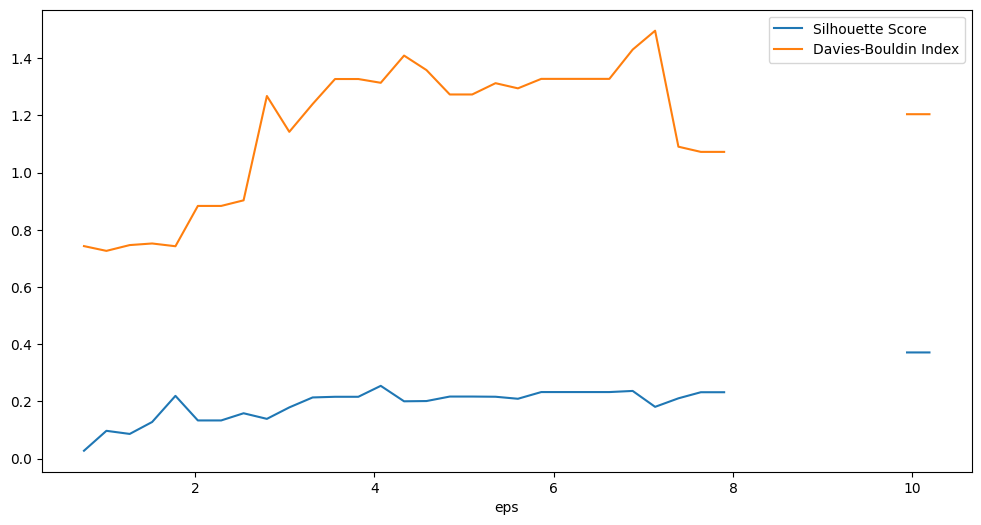

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

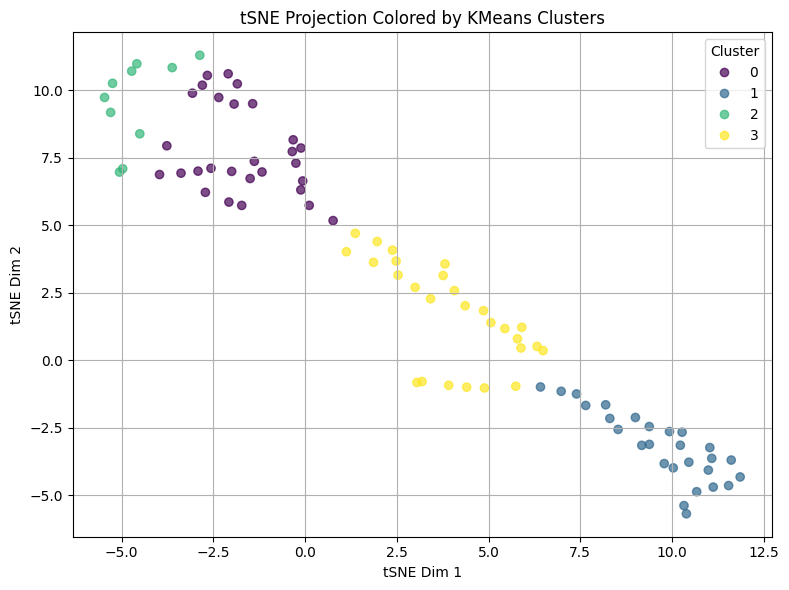

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        33    163          0.504518              0.479984
1   0.07            2        28    104          0.206118              0.658911
2   0.09            2        14     69         -0.102853              0.675728
3   0.11            2        10     50         -0.017567              0.715792
4   0.13            2         8     36          0.246538              0.542297
5   0.15            2         6     25          0.184788              0.710025
6   0.17            2         6     17          0.221080              0.798082
7   0.19            2         2     14          0.496682              0.410099
8   0.21            2         1     10               NaN                   NaN
9   0.22            2         1     10               NaN                   NaN
10  0.24            2         1      9               NaN                   NaN
11  0.26            2         1      9               NaN                   NaN
12  0.28            2         1      9               NaN                   NaN
13  0.30            2         1      9               NaN                   NaN
14  0.32            2         1      8               NaN                   NaN
15  0.34            2         1      8               NaN                   NaN
16  0.36            2         1      8               NaN                   NaN
17  0.38            2         1      7               NaN                   NaN
18  0.40            2         1      7               NaN                   NaN
19  0.42            2         1      6               NaN                   NaN
20  0.44            2         1      6               NaN                   NaN
21  0.46            2         1      6               NaN                   NaN
22  0.48            2         1      6               NaN                   NaN
23  0.50            2         1      6               NaN                   NaN
24  0.52            2         1      6               NaN                   NaN
25  0.53            2         1      6               NaN                   NaN
26  0.55            2         1      6               NaN                   NaN
27  0.57            2         1      5               NaN                   NaN
28  0.59            2         1      5               NaN                   NaN
29  0.61            2         1      5               NaN                   NaN
30  0.63            2         1      5               NaN                   NaN
31  0.65            2         1      5               NaN                   NaN
32  0.67            2         1      5               NaN                   NaN
33  0.69            2         1      5               NaN                   NaN
34  0.71            2         1      5               NaN                   NaN
35  0.73            2         1      5               NaN                   NaN
36  0.75            2         1      5               NaN                   NaN
37  0.77            2         1      5               NaN                   NaN
38  0.79            2         1      5               NaN                   NaN
39  0.81            2         1      5               NaN                   NaN
40  0.83            2         1      5               NaN                   NaN
41  0.84            2         1      4               NaN                   NaN
42  0.86            2         1      4               NaN                   NaN
43  0.88            2         1      4               NaN                   NaN
44  0.90            2         1      3               NaN                   NaN
45  0.92            2         1      3               NaN                   NaN
46  0.94            2         1      2               NaN                   NaN
47  0.96            2         1      2               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

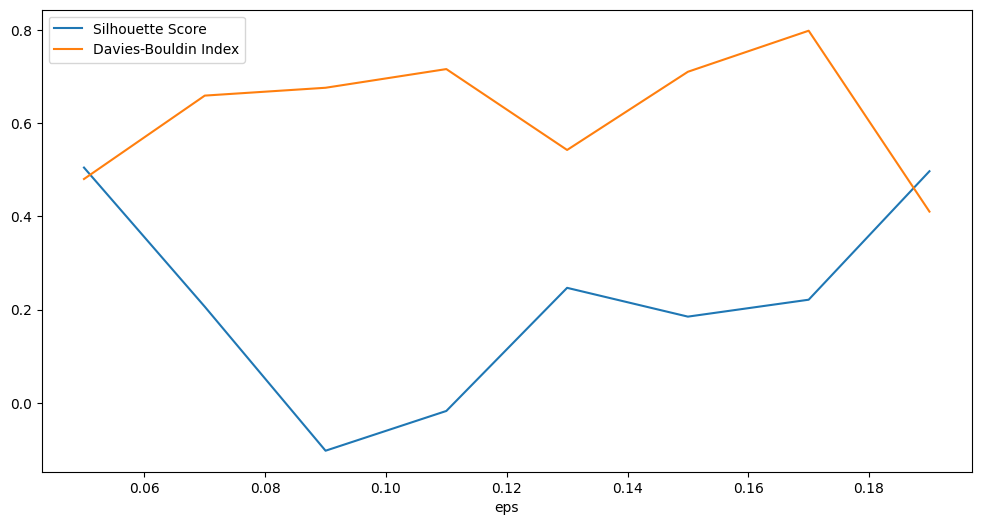

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2008
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2008-06-01 to 2008-08-31
Columns: 263 entries, 10000009 to 25000592
dtypes: float64(263)
memory usage: 189.8 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-06-01  0.572600  0.487983  0.574668  0.304613  0.516562  0.775525   
2008-06-02  0.567629  0.476037  0.570113  0.302344  0.508475  0.759887   
2008-06-03  0.565287  0.465548  0.564172  0.296833  0.500822  0.769402   
2008-06-04  0.566610  0.448636  0.557551  0.289781  0.490651  0.693461   
2008-06-05  0.557982  0.437167  0.551948  0.289174  0.483190  0.665441   
...              ...       ...       ...       ...       ...       ...   
2008-08-27  0.993955  0.507189  0.495200  0.563768  0.794540  0.847533   
2008-08-28  1.042892  0.519962  0.583509  0.588084  0.888404  0.900176   
2008-08-29  0.848973  0.524866  0.560505  0.492086  0.824085  1.038138   
2008-08-30  0.695515  0.519771  0.519490  0.418556  0.727484  1.011039   
2008-08-31  0.637654  0.512357  0.499794  0.380735  0.662307  0.983363   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-06-01  0.761140  0.547769  

          2008-06-01  2008-06-02  2008-06-03  2008-06-04  2008-06-05  \
10000009   -0.054206   -0.054039   -0.053625   -0.052723   -0.052835   
11000011   -0.061619   -0.062077   -0.062366   -0.063058   -0.063647   
11000016   -0.054025   -0.053821   -0.053723   -0.053517   -0.053375   
13000011   -0.077684   -0.077322   -0.077152   -0.076975   -0.076892   
13000019   -0.059115   -0.059230   -0.059275   -0.059377   -0.059529   
...              ...         ...         ...         ...         ...   
7000003    -0.088742   -0.088232   -0.087850   -0.087378   -0.087245   
8000001    -0.079323   -0.079163   -0.078942   -0.078658   -0.078949   
9000001    -0.011876   -0.013880   -0.014865   -0.016093   -0.016878   
9000015    -0.012557   -0.014332   -0.015184   -0.016241   -0.016837   
25000592    0.028000    0.028103    0.028633    0.029823    0.033266   

          2008-06-06  2008-06-07  2008-06-08  2008-06-09  2008-06-10  ...  \
10000009   -0.051490   -0.051339   -0.051181   -0.050687  

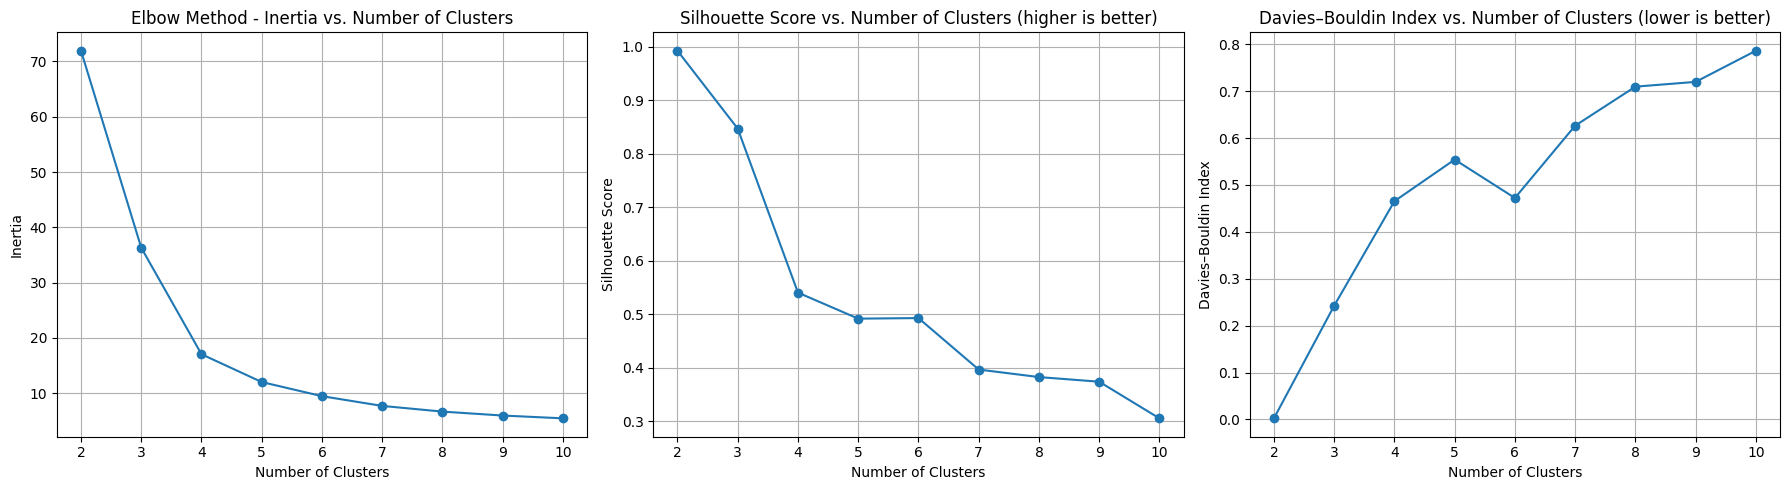

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-06-01  0.572600  0.487983  0.574668  0.304613  0.516562  0.775525   
2008-06-02  0.567629  0.476037  0.570113  0.302344  0.508475  0.759887   
2008-06-03  0.565287  0.465548  0.564172  0.296833  0.500822  0.769402   
2008-06-04  0.566610  0.448636  0.557551  0.289781  0.490651  0.693461   
2008-06-05  0.557982  0.437167  0.551948  0.289174  0.483190  0.665441   
...              ...       ...       ...       ...       ...       ...   
2008-08-27  0.993955  0.507189  0.495200  0.563768  0.794540  0.847533   
2008-08-28  1.042892  0.519962  0.583509  0.588084  0.888404  0.900176   
2008-08-29  0.848973  0.524866  0.560505  0.492086  0.824085  1.038138   
2008-08-30  0.695515  0.519771  0.519490  0.418556  0.727484  1.011039   
2008-08-31  0.637654  0.512357  0.499794  0.380735  0.662307  0.983363   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-06-01  0.761140  0.547769  

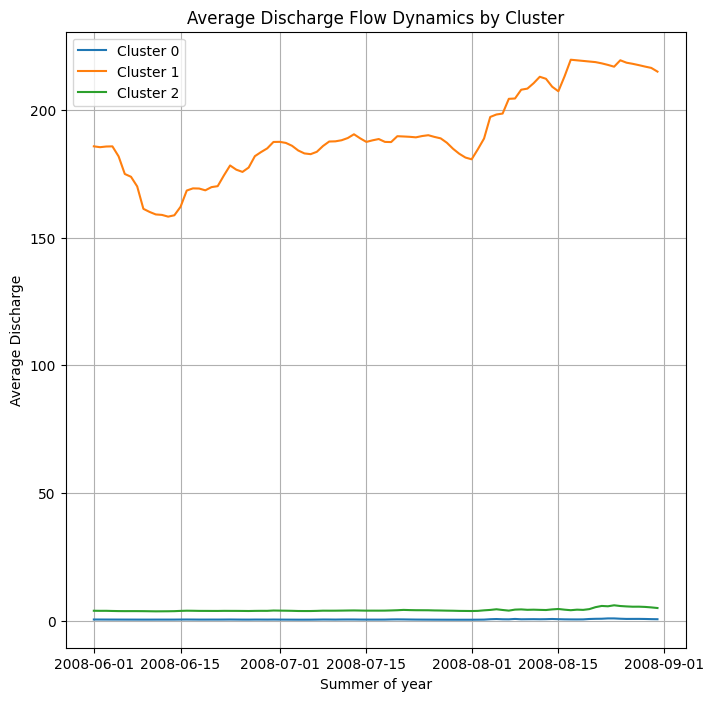

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2008-06-01  0.572600  0.487983  0.574668  0.304613  0.516562  0.775525   
2008-06-02  0.567629  0.476037  0.570113  0.302344  0.508475  0.759887   
2008-06-03  0.565287  0.465548  0.564172  0.296833  0.500822  0.769402   
2008-06-04  0.566610  0.448636  0.557551  0.289781  0.490651  0.693461   
2008-06-05  0.557982  0.437167  0.551948  0.289174  0.483190  0.665441   
...              ...       ...       ...       ...       ...       ...   
2008-08-27  0.993955  0.507189  0.495200  0.563768  0.794540  0.847533   
2008-08-28  1.042892  0.519962  0.583509  0.588084  0.888404  0.900176   
2008-08-29  0.848973  0.524866  0.560505  0.492086  0.824085  1.038138   
2008-08-30  0.695515  0.519771  0.519490  0.418556  0.727484  1.011039   
2008-08-31  0.637654  0.512357  0.499794  0.380735  0.662307  0.983363   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-06-01  0.761140  0.547769  0.897004  0.586646  ...  0.042677  0.130227   
2008-06-02  0.753143  0.541189  0.890197  0.567504  ...  0.036301  0.121081   
2008-06-03  0.751932  0.538767  0.886760  0.561059  ...  0.034941  0.112779   
2008-06-04  0.752765  0.529196  0.882524  0.544859  ...  0.031200  0.105321   
2008-06-05  0.749200  0.533768  0.875337  0.552533  ...  0.028041  0.100726   
...              ...       ...       ...       ...  ...       ...       ...   
2008-08-27  0.720846  0.544901  0.879350  0.630819  ...  0.099009  0.272662   
2008-08-28  0.737583  0.530034  0.909808  0.662763  ...  0.068672  0.163026   
2008-08-29  0.737767  0.501562  0.915467  0.645440  ...  0.059188  0.140657   
2008-08-30  0.735632  0.474804  0.902053  0.602894  ...  0.061589  0.112344   
2008-08-31  0.734689  0.451684  0.884517  0.574896  ...  0.056900  0.095604   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2008-06-01  0.106102  0.095681  0.113597  0.178404  0.285916  1.055748   
2008-06-02  0.096143  0.081506  0.100975  0.178039  0.281364  1.025200   
2008-06-03  0.086184  0.070875  0.088353  0.174771  0.276410  1.007553   
2008-06-04  0.076225  0.063787  0.075731  0.171038  0.270571  0.984715   
2008-06-05  0.071207  0.056700  0.063109  0.173502  0.266199  0.959750   
...              ...       ...       ...       ...       ...       ...   
2008-08-27  0.259304  0.276411  0.277681  0.400494  0.542723  0.690583   
2008-08-28  0.163392  0.248061  0.227193  0.463589  0.568370  0.735333   
2008-08-29  0.141783  0.230342  0.201950  0.468110  0.561293  0.697488   
2008-08-30  0.115347  0.212624  0.176706  0.421968  0.538633  0.626865   
2008-08-31  0.098308  0.177186  0.151462  0.396646  0.512222  0.572715   

             9000015  25000592  
2008-06-01  1.047976  1.510895  
2008-06-02  1.020048  1.503547  
2008-06-03  1.003914  1.503888  
2008-06-04  0.983035  1.508827  
2008-06-05  0.960210  1.520046  
...              ...       ...  
2008-08-27  0.714123  2.307795  
2008-08-28  0.755036  2.342780  
2008-08-29  0.720436  2.337367  
2008-08-30  0.655869  2.255362  
2008-08-31  0.606362  2.192458  

[92 rows x 263 columns]

<Axes: >

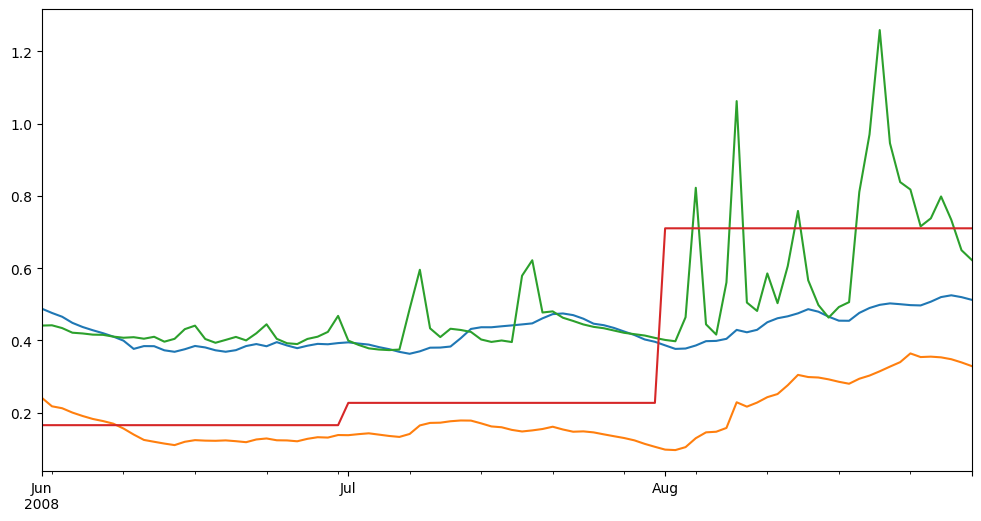

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

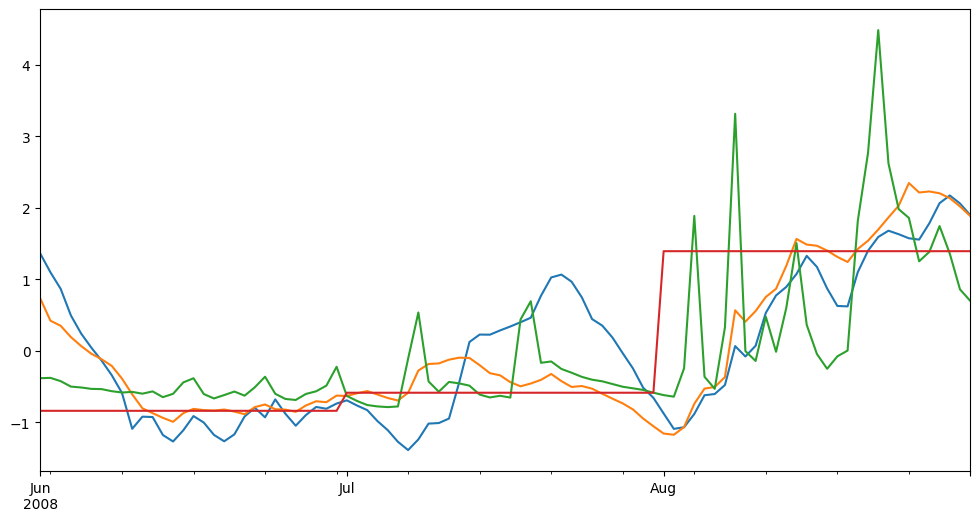

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

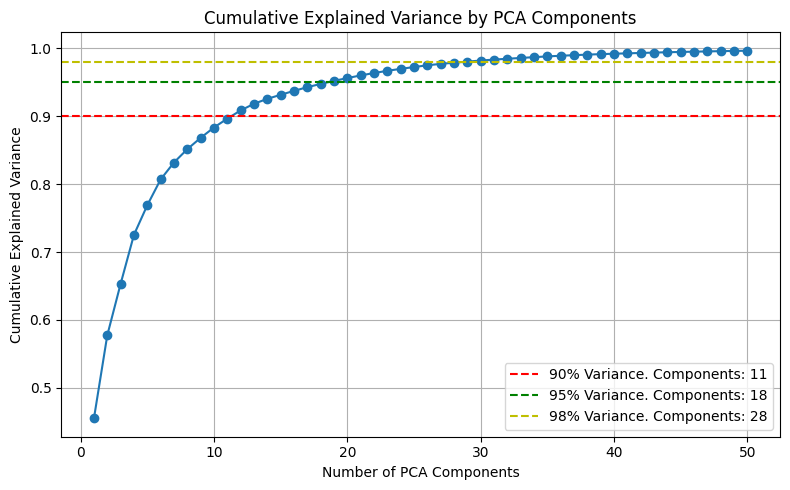

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.87784157e-01,  1.14058598e+01, -1.63688483e+00, ...,
        -2.20703723e-01, -5.19825786e-01,  8.65262419e-01],
       [-9.56564409e-01,  1.06024410e+01, -1.66078998e+00, ...,
        -1.53658561e-01, -2.77594393e-01,  6.26107600e-01],
       [-2.02257048e+00,  9.96576273e+00, -1.56004673e+00, ...,
        -2.58484581e-01, -1.06091528e-01,  4.73269522e-01],
       ...,
       [ 2.07016187e+01,  1.54847762e+00, -2.34741578e+00, ...,
        -8.70184745e-01,  5.51551619e-01, -1.28610451e+00],
       [ 1.48757440e+01,  1.58604268e+00, -3.82589159e+00, ...,
        -8.38273400e-01,  6.14285781e-03, -1.58515127e+00],
       [ 1.10584261e+01,  1.19359085e+00, -3.96632917e+00, ...,
        -4.69329087e-01,  7.69481827e-03, -1.62602202e+00]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


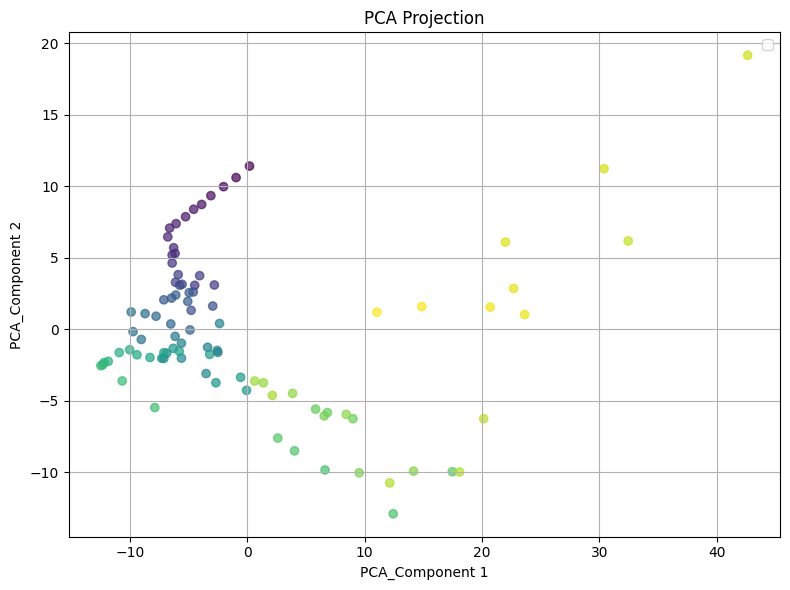

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


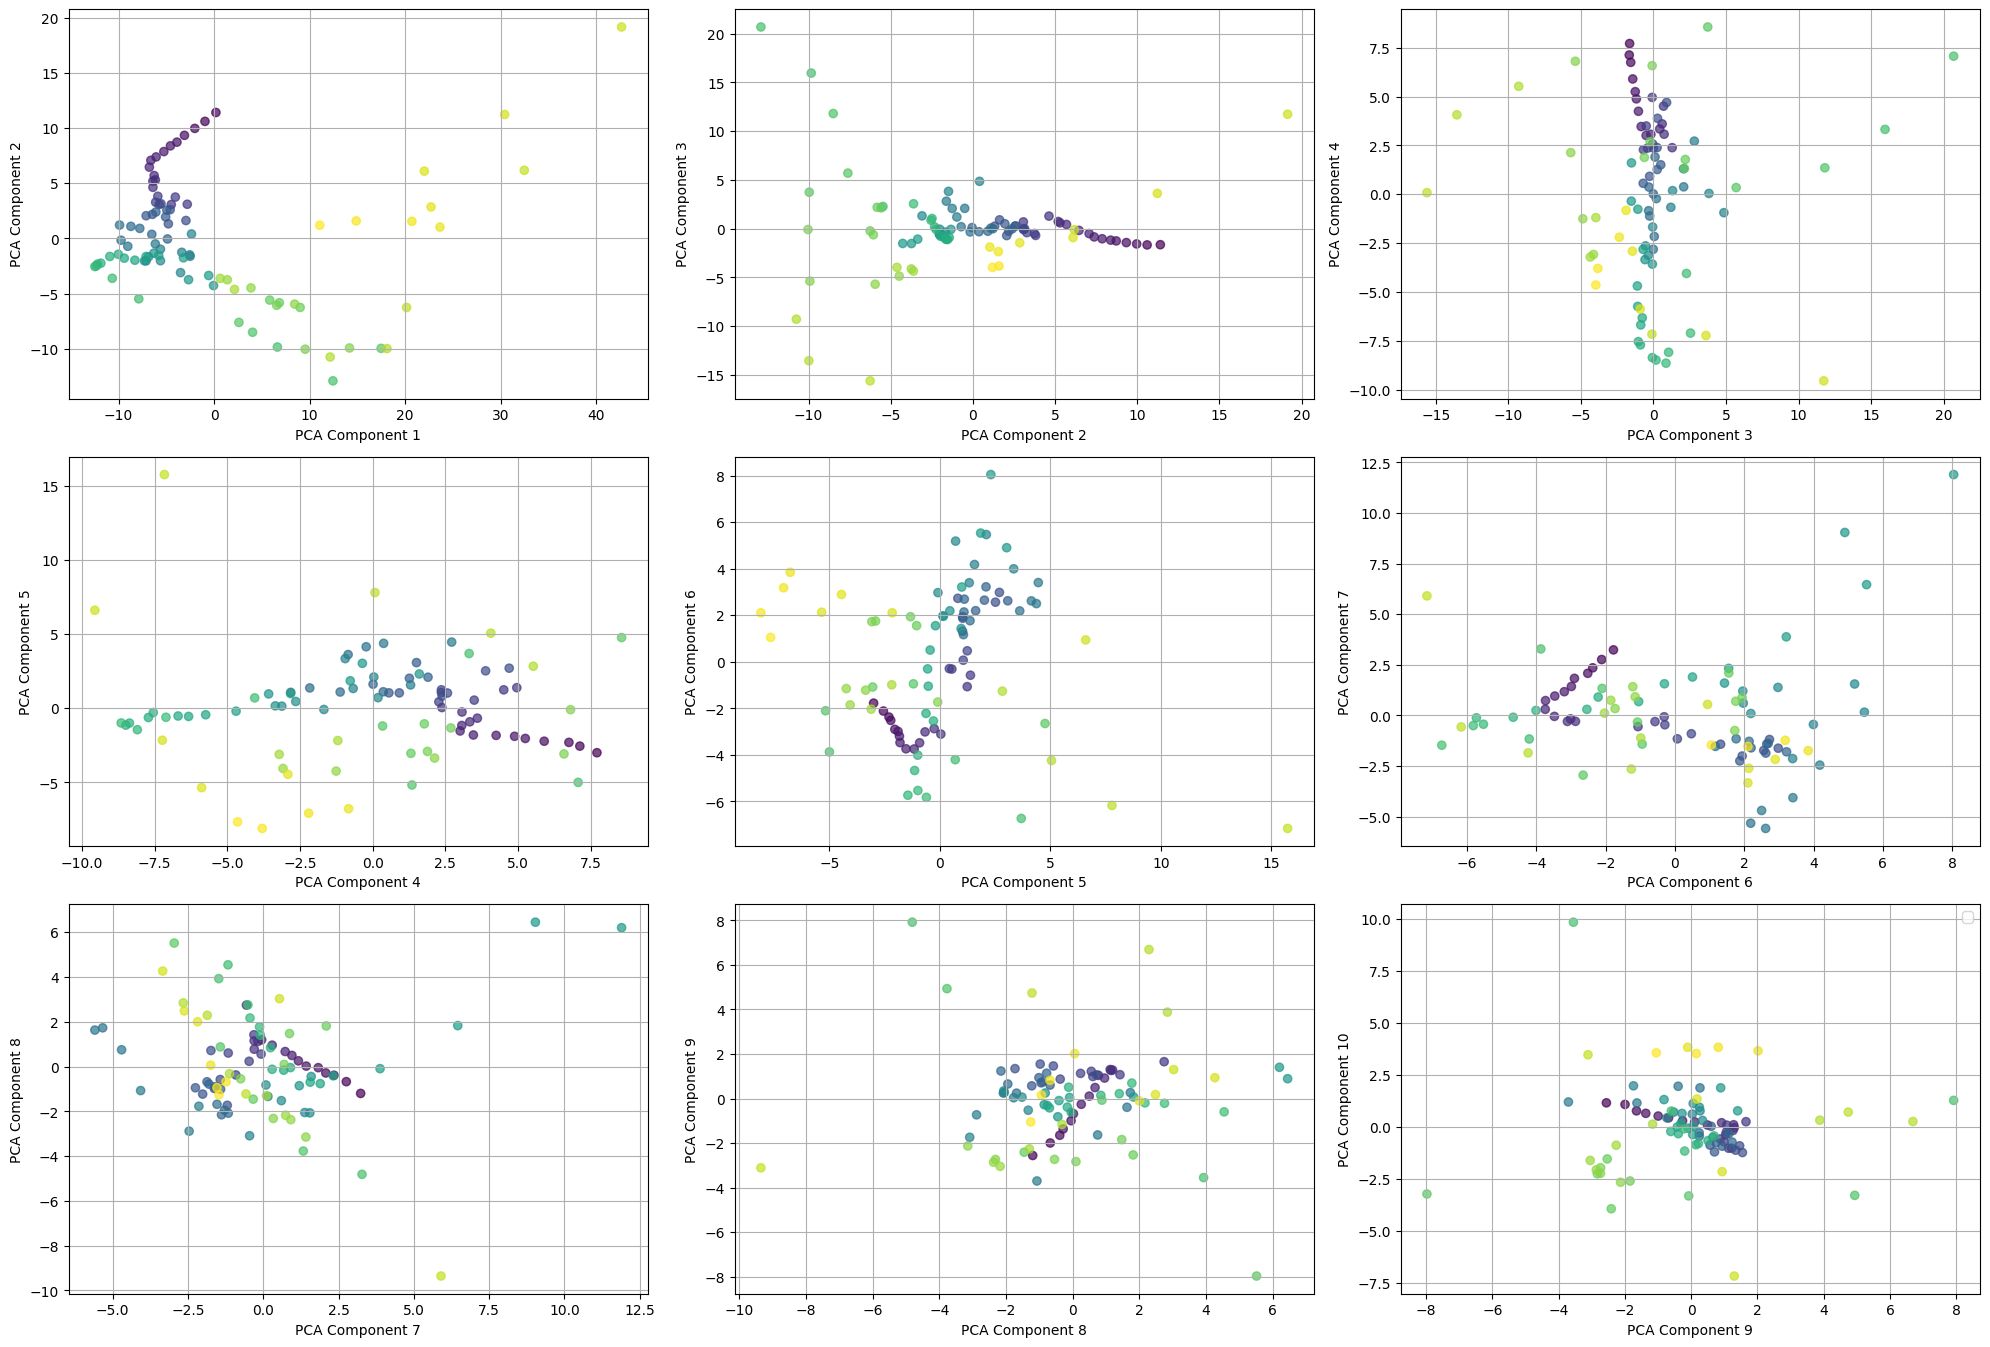

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.228
KMeans Davies-Bouldin Index is 1.349


<Axes: xlabel='k'>

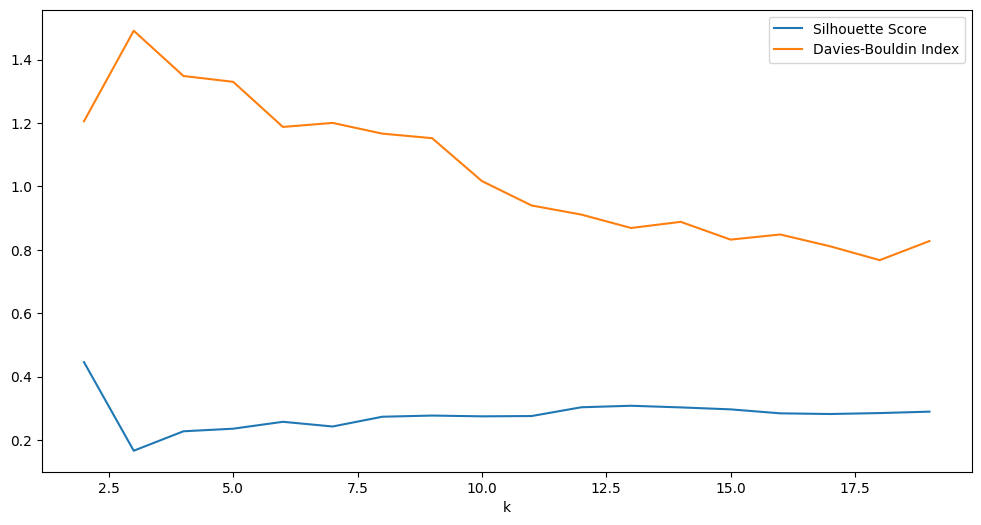

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     89               NaN   
4    1.52            3         2     83         -0.147735   
5    1.78            3         3     75         -0.195621   
6    2.03            3         6     63         -0.078512   
7    2.29            3         6     61         -0.050377   
8    2.54            3         6     57         -0.021621   
9    2.80            3         6     56         -0.010885   
10   3.05            3         7     51          0.015895   
11   3.31            3         5     51          0.013517   
12   3.56            3         5     45          0.070573   
13   3.82            3         6     40          0.068328   
14   4.07            3         5     40          0.078385   
15   4.33            3         5     39          0.089158   
16   4.58            3         4     37          0.132664   
17   4.84            3         3     36          0.144116   
18   5.09            3         3     36          0.144116   
19   5.35            3         3     36          0.144116   
20   5.60            3         3     34          0.144772   
21   5.86            3         2     34          0.125978   
22   6.11            3         2     30          0.139962   
23   6.37            3         3     26          0.141456   
24   6.62            3         4     21          0.162186   
25   6.88            3         4     19          0.198469   
26   7.13            3         4     16          0.223848   
27   7.39            3         4     16          0.223848   
28   7.64            3         4     16          0.223848   
29   7.90            3         4     15          0.231357   
30   8.15            3         4     15          0.231357   
31   8.41            3         4     15          0.231357   
32   8.66            3         4     15          0.231357   
33   8.92            3         4     15          0.231357   
34   9.17            3         4     15          0.231357   
35   9.43            3         4     12          0.237563   
36   9.68            3         4     12          0.237563   
37   9.94            3         3     12          0.284789   
38  10.19            3         3     12          0.284789   
39  10.45            3         3     12          0.284789   
40  10.70            3         3     12          0.284789   
41  10.96            3         3     11          0.305838   
42  11.21            3         3     11          0.305838   
43  11.47            3         3     11          0.305838   
44  11.72            3         3     11          0.305838   
45  11.98            3         2     11          0.408538   
46  12.23            3         2     11          0.408538   
47  12.49            3         2      9          0.414652   
48  12.74            3         2      8          0.447741   
49  13.00            3         2      8          0.447741   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.349996  
5               1.604835  
6               1.333614  
7               1.313254  
8               1.330151  
9               1.331324  
10              1.281562  
11              1.343698  
12              1.306566  
13              1.381532  
14              1.406284  
15              1.442033  
16              1.498827  
17              1.583093  
18              1.583093  
19              1.583093  
20              1.553509  
21              1.671396  
22              1.564482  
23              1.572807  
24              2.151134  
25              2.141818  
26              1.932370  
27              1.932370  
28              1.932370  
29              1.927798  
30              1.927798  
31              1.927798  
32 

<Axes: xlabel='eps'>

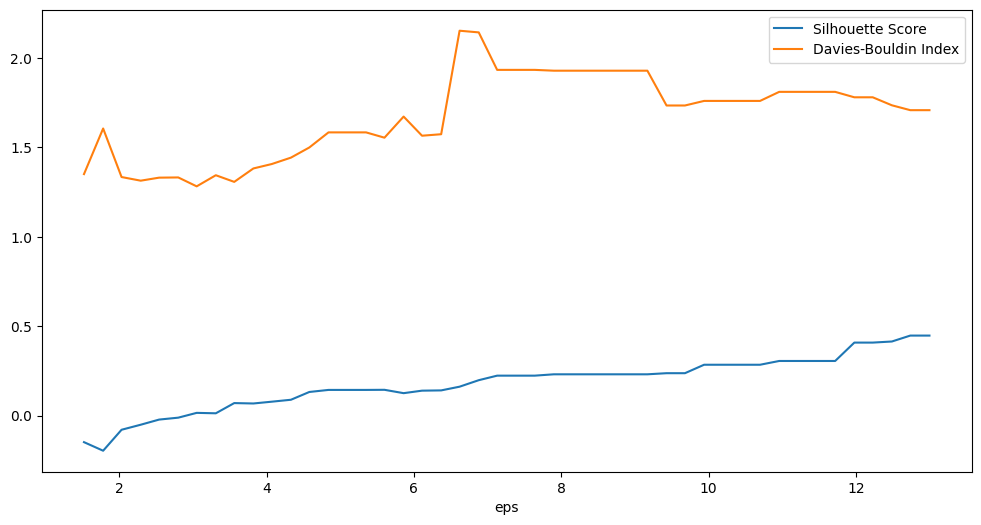

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

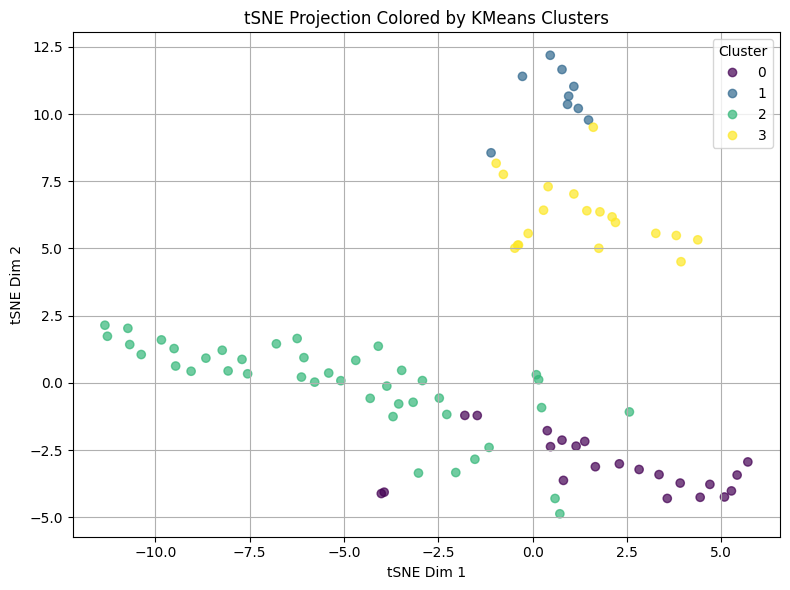

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        18     86          0.080453   
1    0.05            2        17     76          0.068615   
2    0.06            2        14     73          0.048688   
3    0.06            2         8     66         -0.040636   
4    0.07            2         7     62          0.167703   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.831739   
196  0.99            2         2      2          0.831739   
197  0.99            2         2      2          0.831739   
198  1.00            2         2      2          0.831739   
199  1.00            2         2      2          0.831739   

     Davies-Bouldin Index  
0                0.654260  
1                0.722511  
2                0.700376  
3                0.633192  
4                0.538312  
..                    ...  
195              0.235094  
196              0.235094  
197              0.235094  
198              0.235094  
199              0.235094  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

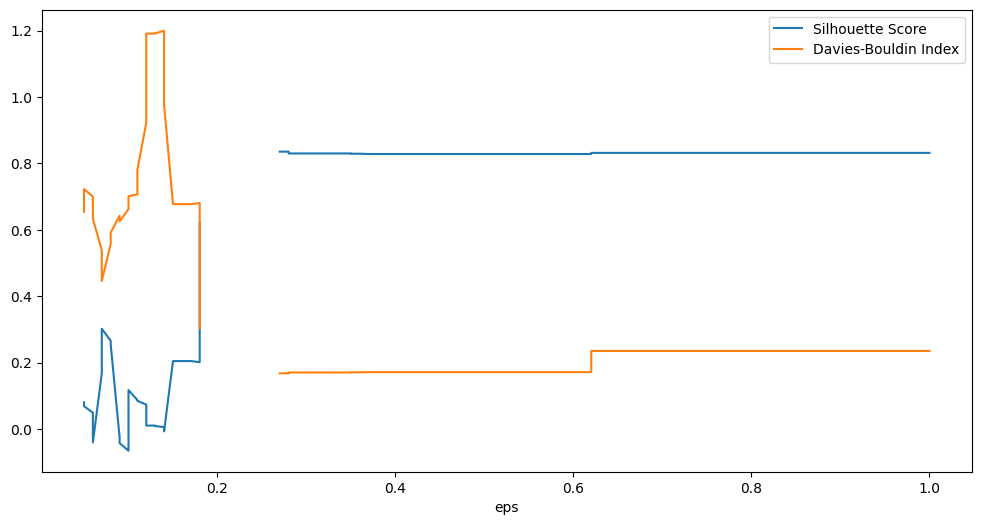

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2008
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2008-09-01 to 2008-11-30
Columns: 263 entries, 10000009 to 25000592
dtypes: float64(263)
memory usage: 187.7 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-09-01  0.609244  0.500089  0.495464  0.360826  0.622496  0.862879   
2008-09-02  0.607104  0.497269  0.518152  0.363885  0.608783  0.804837   
2008-09-03  0.634487  0.524252  0.822896  0.405789  0.689564  0.773668   
2008-09-04  0.653731  0.544176  0.975537  0.393695  0.683579  0.863042   
2008-09-05  0.662150  0.568221  0.998880  0.370239  0.702094  1.019647   
...              ...       ...       ...       ...       ...       ...   
2008-11-26  0.759936  2.423155  1.653801  0.551582  0.920569  1.123894   
2008-11-27  0.848059  2.338163  1.652581  0.610791  0.977210  1.000141   
2008-11-28  0.949621  2.326495  1.584609  0.751853  1.049090  1.338886   
2008-11-29  1.064277  2.285276  1.574369  0.815840  1.134575  1.388583   
2008-11-30  1.083450  2.221658  1.515478  0.800628  1.111513  1.322446   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-09-01  0.735848  0.426453  

          2008-09-01  2008-09-02  2008-09-03  2008-09-04  2008-09-05  \
10000009    0.033133    0.041991   -0.095923   -0.199731   -0.250315   
11000011   -0.126951   -0.120821   -0.238247   -0.304992   -0.318666   
11000016   -0.133733   -0.089866    0.147335    0.109460   -0.005282   
13000011   -0.331190   -0.318545   -0.391197   -0.449575   -0.462734   
13000019    0.052567    0.044481   -0.024812   -0.171053   -0.221248   
...              ...         ...         ...         ...         ...   
7000003    -0.297598   -0.282990   -0.394477   -0.425533   -0.393133   
8000001    -0.134584   -0.133000   -0.269087   -0.342134   -0.359799   
9000001    -0.036243    0.005052    0.120854    0.147870    0.132360   
9000015     0.014457    0.053725    0.138870    0.143718    0.118451   
25000592    2.352084    2.483100    2.463977    1.646463    1.164700   

          2008-09-06  2008-09-07  2008-09-08  2008-09-09  2008-09-10  ...  \
10000009   -0.252990   -0.136560    0.133723    0.276889  

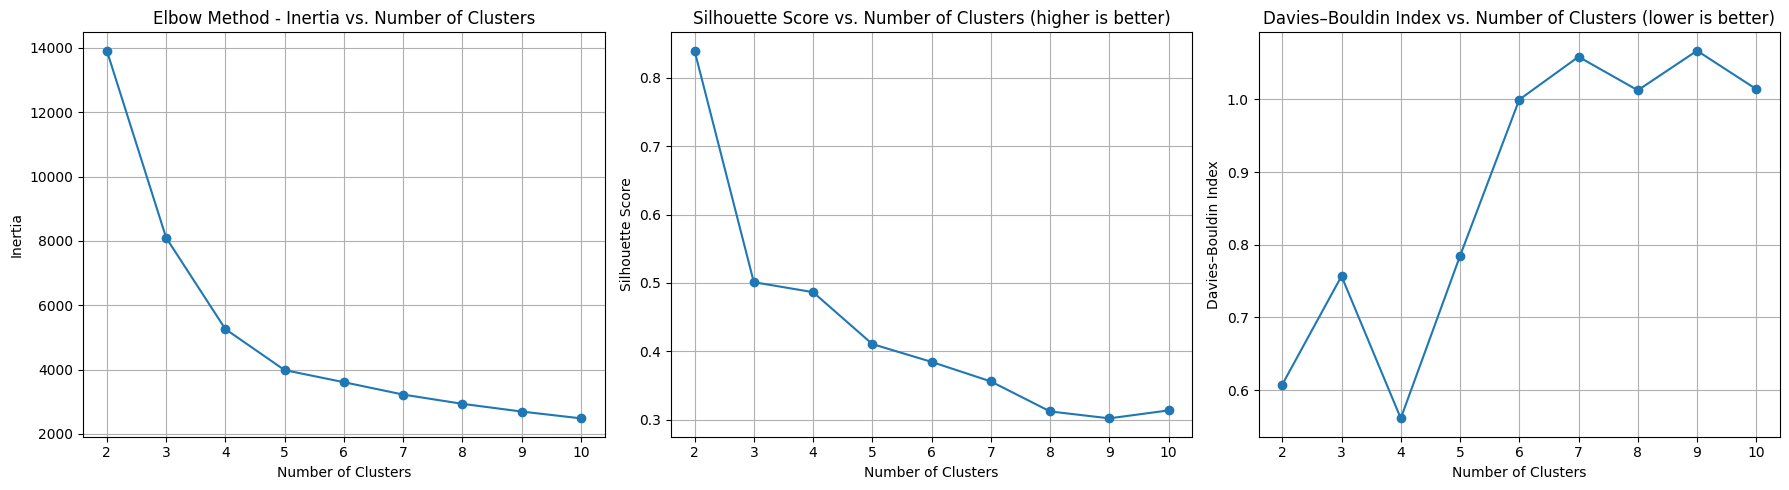

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        2
11000016        2
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-09-01  0.609244  0.500089  0.495464  0.360826  0.622496  0.862879   
2008-09-02  0.607104  0.497269  0.518152  0.363885  0.608783  0.804837   
2008-09-03  0.634487  0.524252  0.822896  0.405789  0.689564  0.773668   
2008-09-04  0.653731  0.544176  0.975537  0.393695  0.683579  0.863042   
2008-09-05  0.662150  0.568221  0.998880  0.370239  0.702094  1.019647   
...              ...       ...       ...       ...       ...       ...   
2008-11-26  0.759936  2.423155  1.653801  0.551582  0.920569  1.123894   
2008-11-27  0.848059  2.338163  1.652581  0.610791  0.977210  1.000141   
2008-11-28  0.949621  2.326495  1.584609  0.751853  1.049090  1.338886   
2008-11-29  1.064277  2.285276  1.574369  0.815840  1.134575  1.388583   
2008-11-30  1.083450  2.221658  1.515478  0.800628  1.111513  1.322446   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-09-01  0.735848  0.426453  

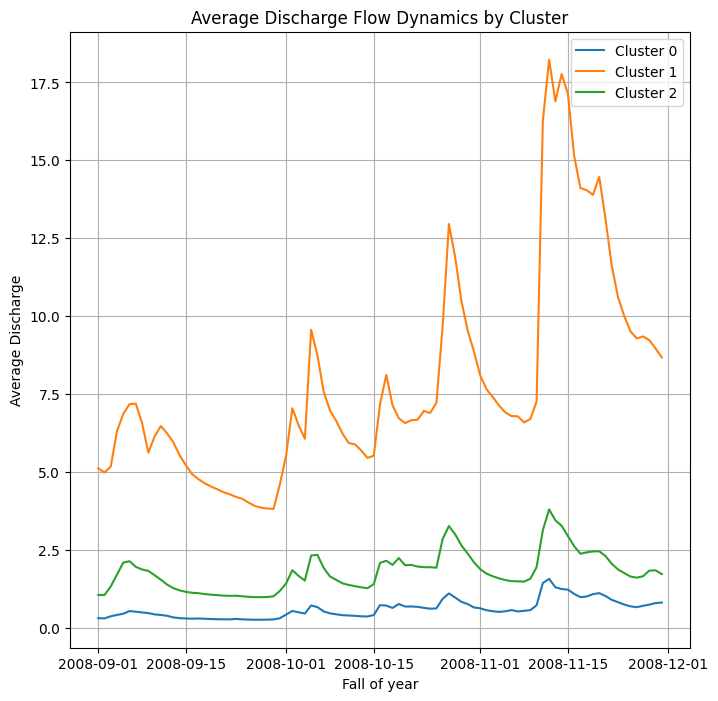

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2008-09-01  0.609244  0.500089  0.495464  0.360826  0.622496  0.862879   
2008-09-02  0.607104  0.497269  0.518152  0.363885  0.608783  0.804837   
2008-09-03  0.634487  0.524252  0.822896  0.405789  0.689564  0.773668   
2008-09-04  0.653731  0.544176  0.975537  0.393695  0.683579  0.863042   
2008-09-05  0.662150  0.568221  0.998880  0.370239  0.702094  1.019647   
...              ...       ...       ...       ...       ...       ...   
2008-11-26  0.759936  2.423155  1.653801  0.551582  0.920569  1.123894   
2008-11-27  0.848059  2.338163  1.652581  0.610791  0.977210  1.000141   
2008-11-28  0.949621  2.326495  1.584609  0.751853  1.049090  1.338886   
2008-11-29  1.064277  2.285276  1.574369  0.815840  1.134575  1.388583   
2008-11-30  1.083450  2.221658  1.515478  0.800628  1.111513  1.322446   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-09-01  0.735848  0.426453  0.865028  0.563509  ...  0.054523  0.094247   
2008-09-02  0.737673  0.435322  0.857121  0.567255  ...  0.054394  0.084261   
2008-09-03  0.734552  0.503974  0.877070  0.586621  ...  0.056701  0.073865   
2008-09-04  0.738749  0.500017  0.903578  0.597578  ...  0.058060  0.078675   
2008-09-05  0.733199  0.464891  0.923412  0.608312  ...  0.058861  0.085708   
...              ...       ...       ...       ...  ...       ...       ...   
2008-11-26  0.839310  0.534380  0.864039  0.693545  ...  0.394525  0.669814   
2008-11-27  0.855738  0.536708  0.887348  0.740541  ...  0.402066  1.134624   
2008-11-28  0.894179  0.617743  0.946235  0.834011  ...  0.411867  0.966973   
2008-11-29  0.948666  0.630159  1.011761  0.924959  ...  0.423229  0.743729   
2008-11-30  0.993985  0.630297  1.045986  0.943267  ...  0.436850  0.661663   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2008-09-01  0.095482  0.148836  0.138840  0.383731  0.494884  0.561939   
2008-09-02  0.085651  0.120487  0.126219  0.387870  0.489053  0.582184   
2008-09-03  0.077814  0.099224  0.130636  0.403248  0.500366  0.802386   
2008-09-04  0.082309  0.083383  0.134956  0.418717  0.505519  1.015514   
2008-09-05  0.093366  0.070228  0.120175  0.465887  0.511694  1.188030   
...              ...       ...       ...       ...       ...       ...   
2008-11-26  0.610651  1.133992  1.456344  0.690889  0.852047  1.775714   
2008-11-27  1.150723  1.771863  1.792820  0.769461  0.954301  1.850334   
2008-11-28  0.977886  1.488365  1.612677  0.841423  0.979803  2.021565   
2008-11-29  0.752792  1.098555  1.532313  0.954708  1.026599  2.136737   
2008-11-30  0.669410  0.956806  1.404175  1.179079  1.194324  1.982605   

             9000015  25000592  
2008-09-01  0.596510  2.190453  
2008-09-02  0.615019  2.253885  
2008-09-03  0.816340  2.617198  
2008-09-04  1.011193  2.575247  
2008-09-05  1.168916  2.606695  
...              ...       ...  
2008-11-26  1.706209  1.578695  
2008-11-27  1.774430  1.603114  
2008-11-28  1.930979  1.897586  
2008-11-29  2.036275  1.684934  
2008-11-30  1.895359  1.594881  

[91 rows x 263 columns]

<Axes: >

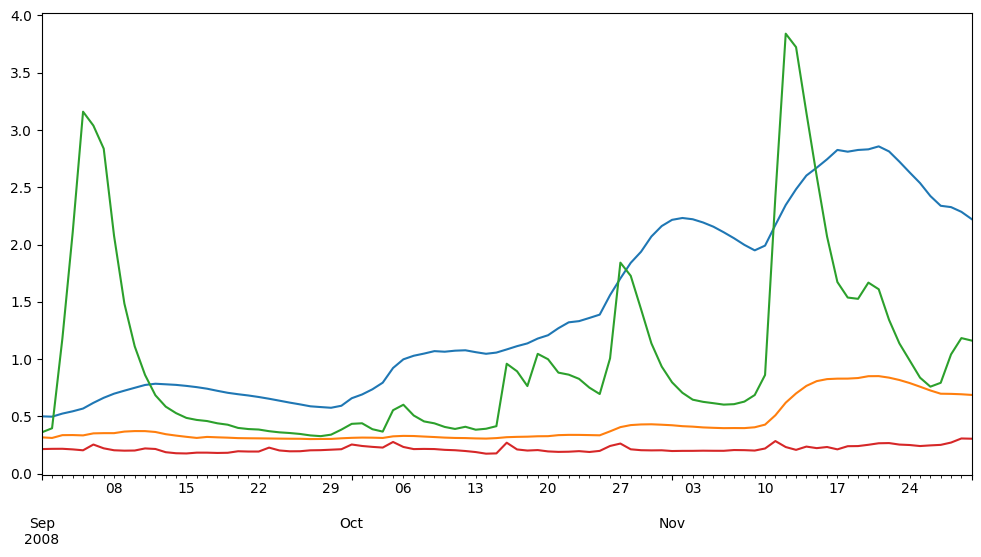

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

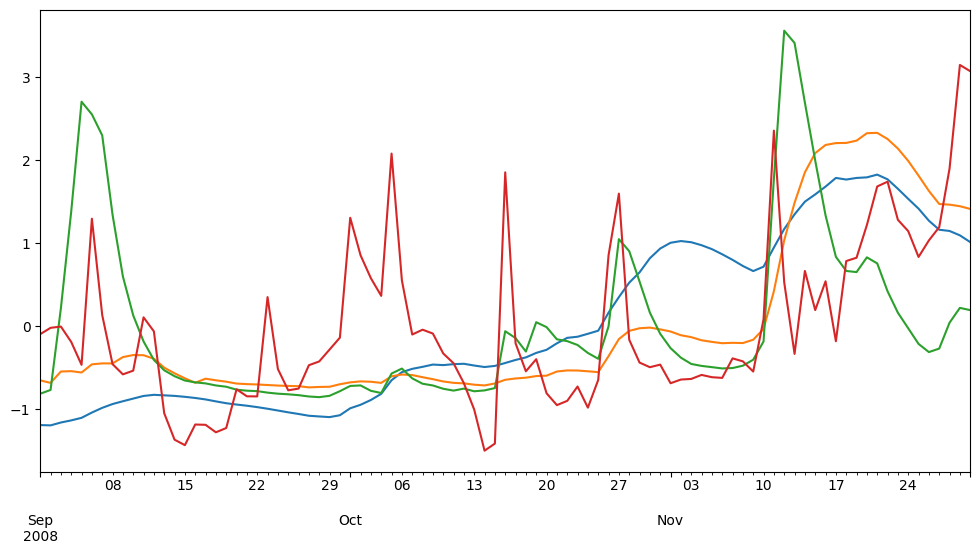

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

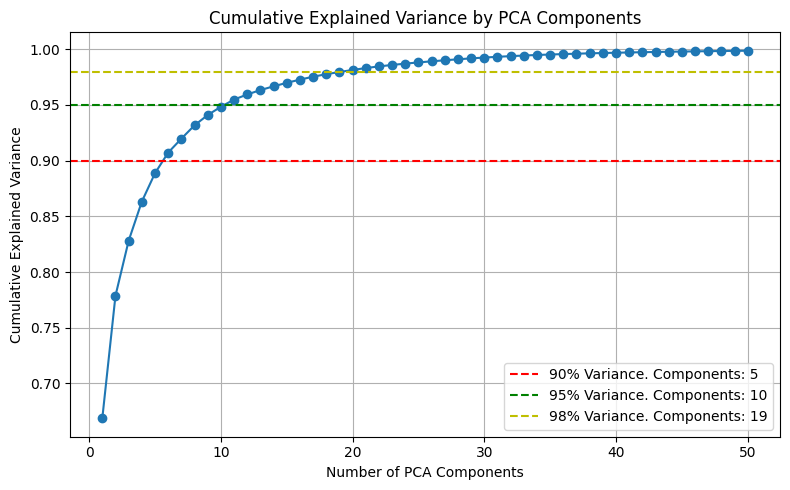

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.34025423e+01, -2.10469474e+00, -2.36198814e+00, ...,
         1.00799315e+00, -2.06938485e+00,  1.17700447e-01],
       [-1.35956065e+01, -1.63747423e+00, -2.75007103e+00, ...,
         1.00511248e+00, -1.86451489e+00,  1.40295897e-01],
       [-9.99955151e+00,  1.32192646e+00, -5.17374193e+00, ...,
         3.48683013e-01, -4.15968467e-01, -1.20767538e-01],
       ...,
       [ 8.45703918e+00, -7.79828545e+00, -1.94987395e+00, ...,
         1.03772507e-02,  9.97668117e-01,  1.99824375e-01],
       [ 1.01673702e+01, -9.09327057e+00, -1.02564372e+00, ...,
        -5.74133169e-01, -2.68950548e-01, -1.96755425e-01],
       [ 1.08877265e+01, -1.12519244e+01, -1.88475364e+00, ...,
        -1.63345179e+00, -6.36627699e-01,  4.35833307e-01]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


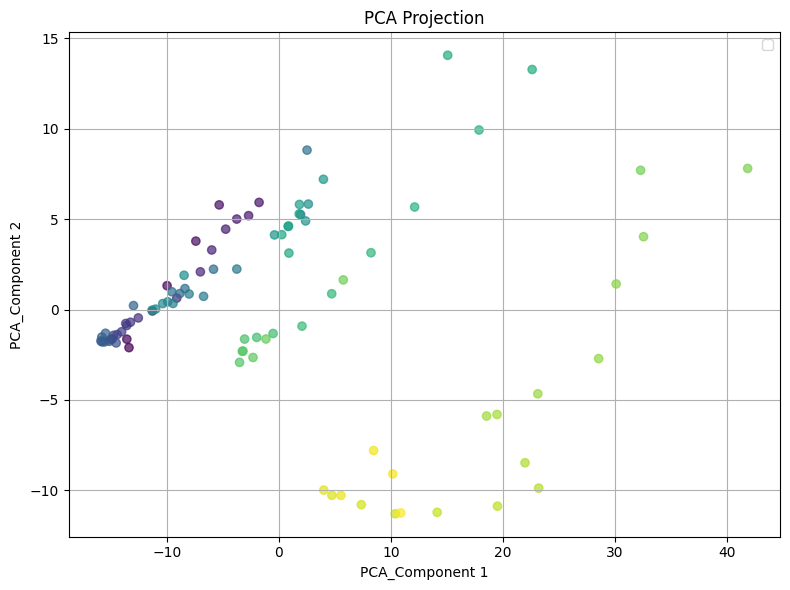

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


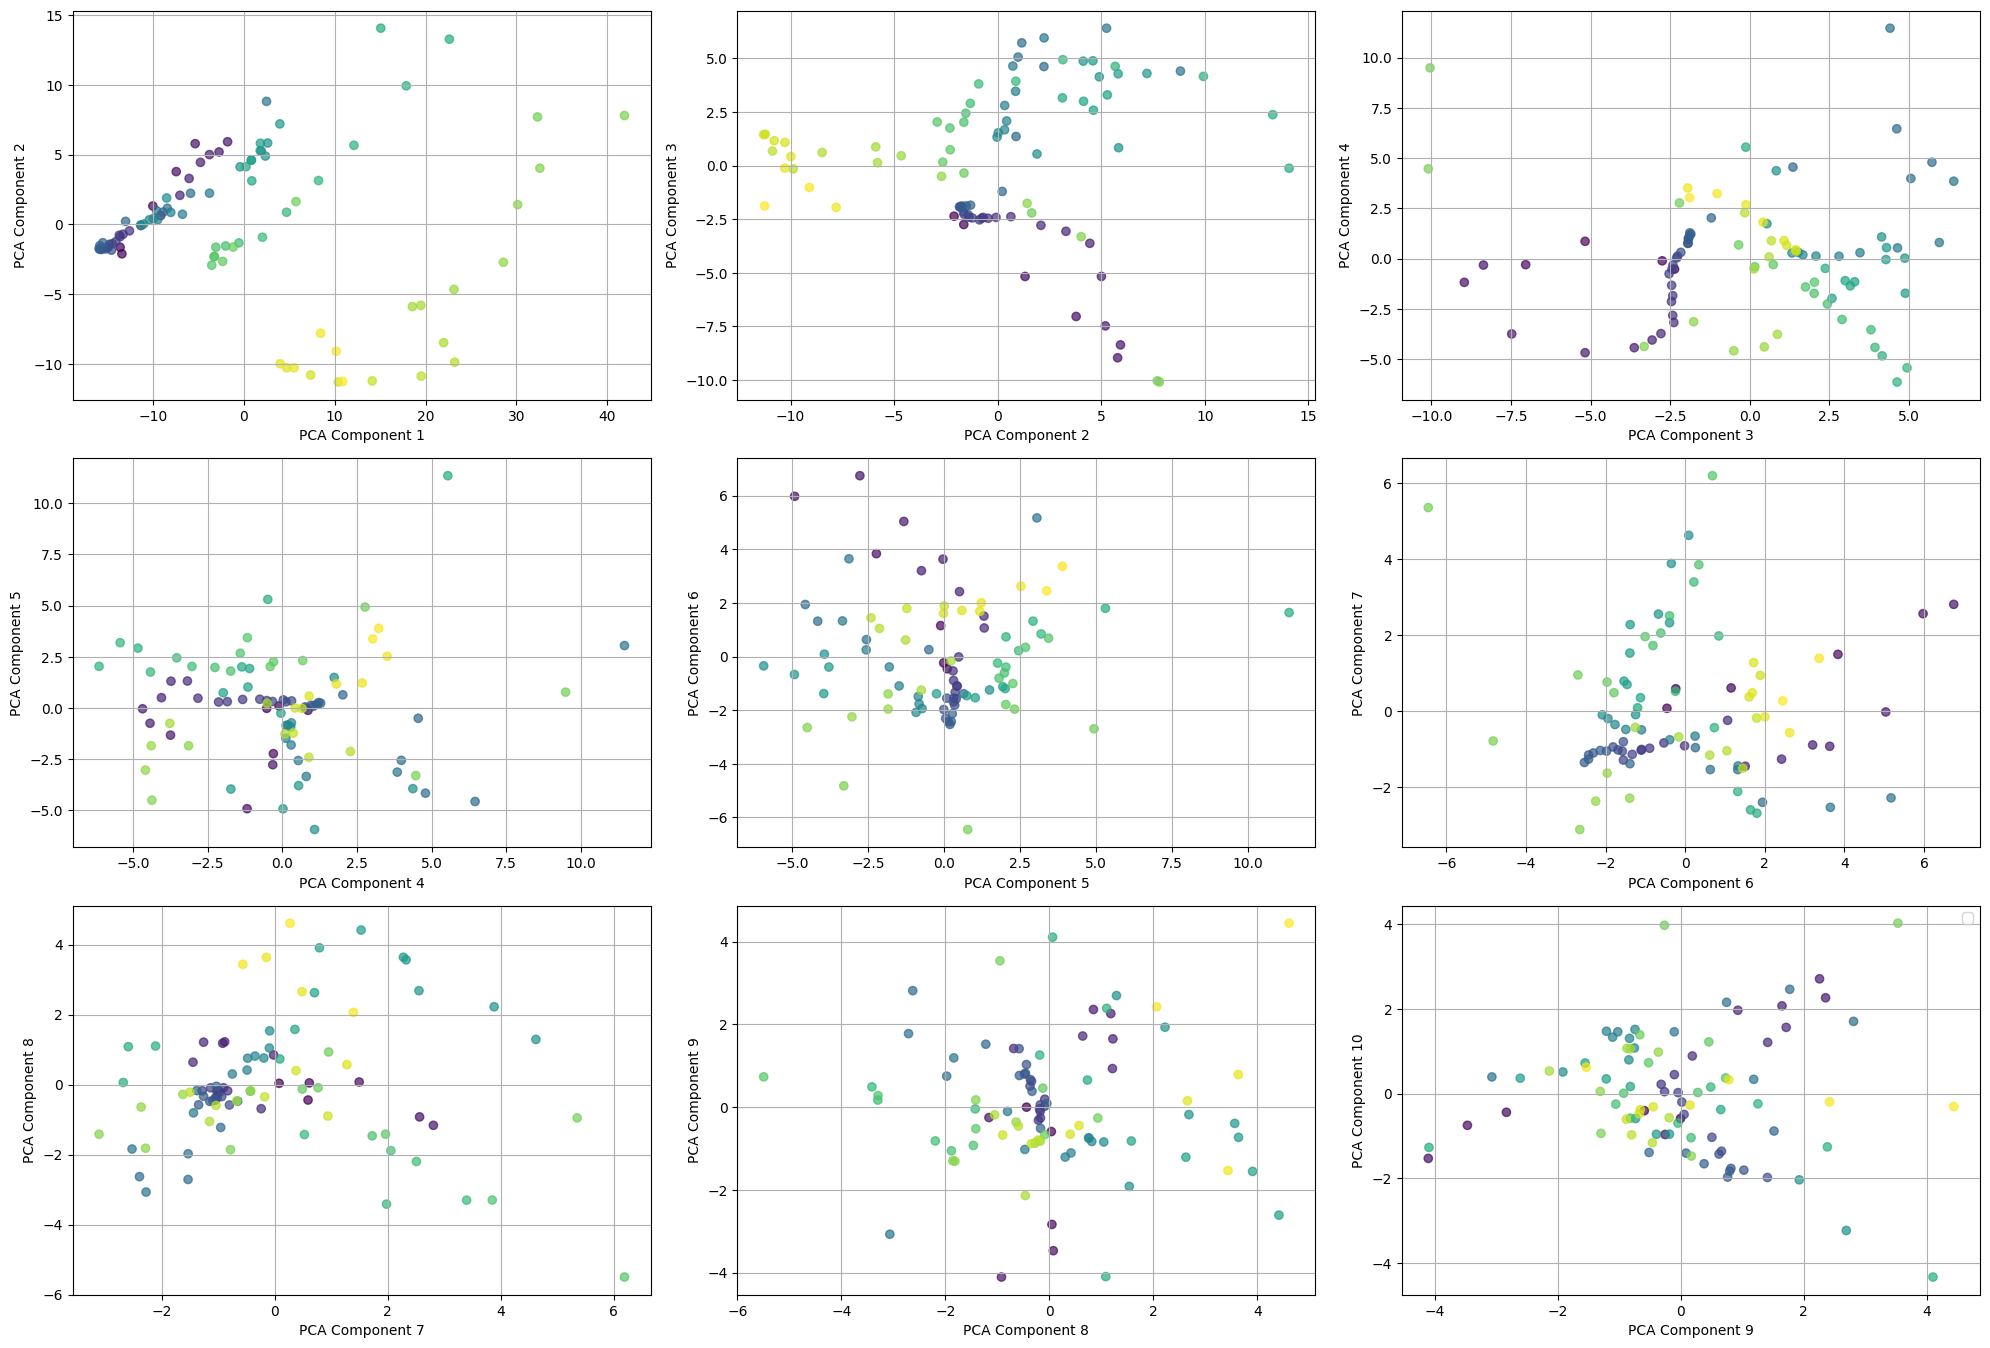

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.327
KMeans Davies-Bouldin Index is 1.231


<Axes: xlabel='k'>

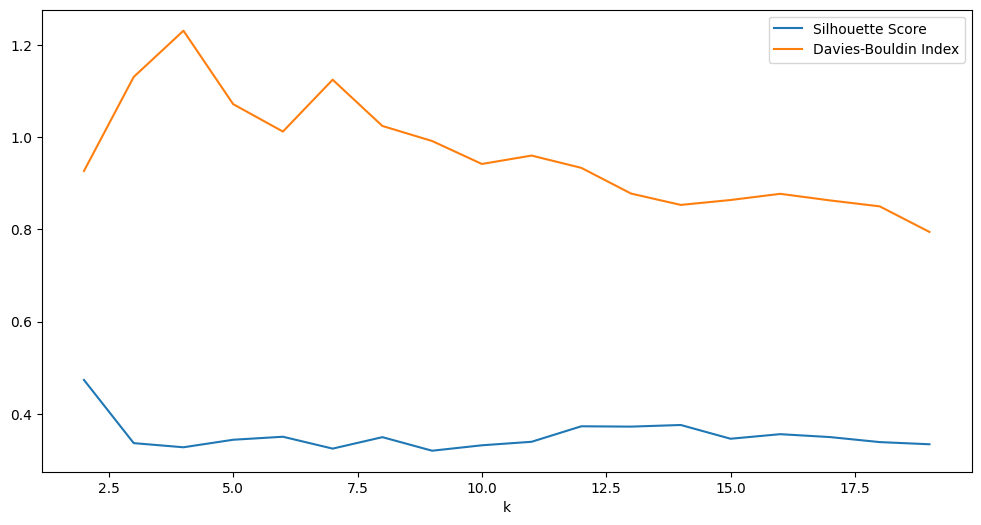

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         2     85         -0.080662   
2    1.01            3         2     78         -0.008771   
3    1.27            3         2     73         -0.013639   
4    1.52            3         2     70          0.039164   
5    1.78            3         2     69          0.044585   
6    2.03            3         2     69          0.044585   
7    2.29            3         3     65         -0.037992   
8    2.54            3         3     64         -0.025536   
9    2.80            3         5     57          0.003872   
10   3.05            3         5     53          0.049449   
11   3.31            3         5     53          0.049449   
12   3.56            3         5     51          0.063287   
13   3.82            3         5     46         -0.000068   
14   4.07            3         5     43          0.041973   
15   4.33            3         5     43          0.041973   
16   4.58            3         5     39          0.085256   
17   4.84            3         7     33          0.103598   
18   5.09            3         7     32          0.111747   
19   5.35            3         8     26          0.140279   
20   5.60            3         7     24          0.158492   
21   5.86            3         5     24          0.203063   
22   6.11            3         5     24          0.203063   
23   6.37            3         4     22          0.213713   
24   6.62            3         4     14          0.243861   
25   6.88            3         4     12          0.259136   
26   7.13            3         3     10          0.305753   
27   7.39            3         3      9          0.306515   
28   7.64            3         3      9          0.306515   
29   7.90            3         3      9          0.306515   
30   8.15            3         3      8          0.302971   
31   8.41            3         2      6          0.428883   
32   8.66            3         2      6          0.428883   
33   8.92            3         2      6          0.428883   
34   9.17            3         2      6          0.428883   
35   9.43            3         2      6          0.428883   
36   9.68            3         2      6          0.428883   
37   9.94            3         2      5          0.432452   
38  10.19            3         2      4          0.421018   
39  10.45            3         2      4          0.421018   
40  10.70            3         2      4          0.421018   
41  10.96            3         2      4          0.421018   
42  11.21            3         2      4          0.421018   
43  11.47            3         2      4          0.421018   
44  11.72            3         2      4          0.421018   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               0.880601  
2               0.895310  
3               1.002821  
4               0.982397  
5               0.977711  
6               0.977711  
7               1.419881  
8               1.420617  
9               1.552740  
10              1.564973  
11              1.564973  
12              1.528947  
13              1.638288  
14              1.641258  
15              1.641258  
16              1.550642  
17              1.541973  
18              1.510958  
19              1.526342  
20              1.567198  
21              1.719054  
22              1.719054  
23              1.734891  
24              1.478053  
25              1.376311  
26              1.472601  
27              1.393127  
28              1.393127  
29              1.393127  
30              1.431928  
31              1.362807  
32 

<Axes: xlabel='eps'>

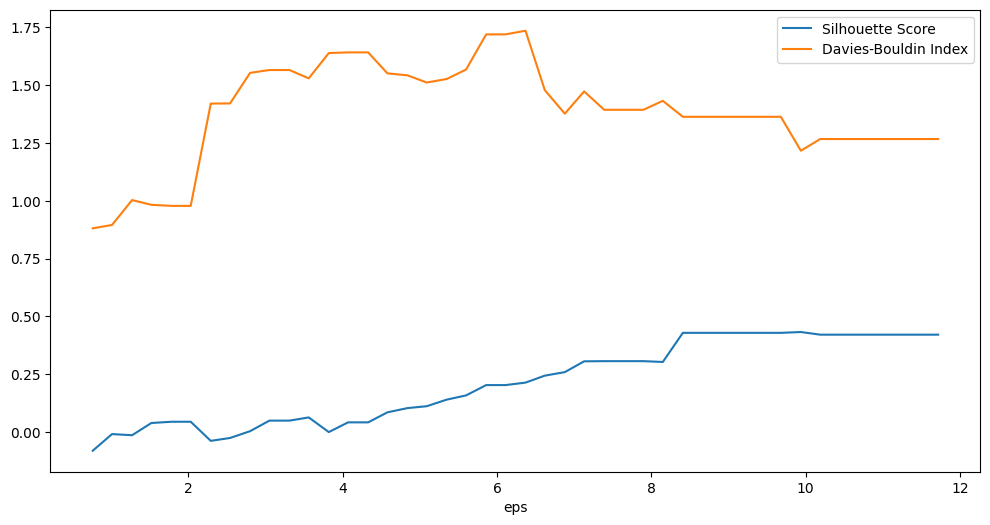

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

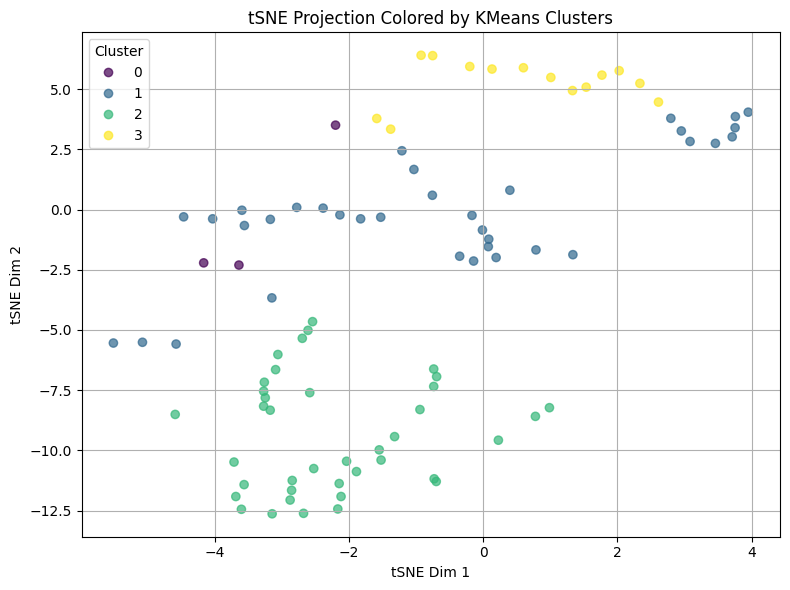

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    253          0.998068   
1    0.05            2         5    253          0.998068   
2    0.06            2         5    253          0.998068   
3    0.06            2         5    253          0.998068   
4    0.07            2         5    253          0.998068   
..    ...          ...       ...    ...               ...   
195  0.98            2        21     80          0.304242   
196  0.99            2        21     80          0.304242   
197  0.99            2        21     80          0.304242   
198  1.00            2        21     80          0.304242   
199  1.00            2        22     78          0.299835   

     Davies-Bouldin Index  
0                0.002874  
1                0.002874  
2                0.002874  
3                0.002874  
4                0.002874  
..                    ...  
195              0.539677  
196              0.539677  
197              0.539677  
198              0.539677  
199              0.563708  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

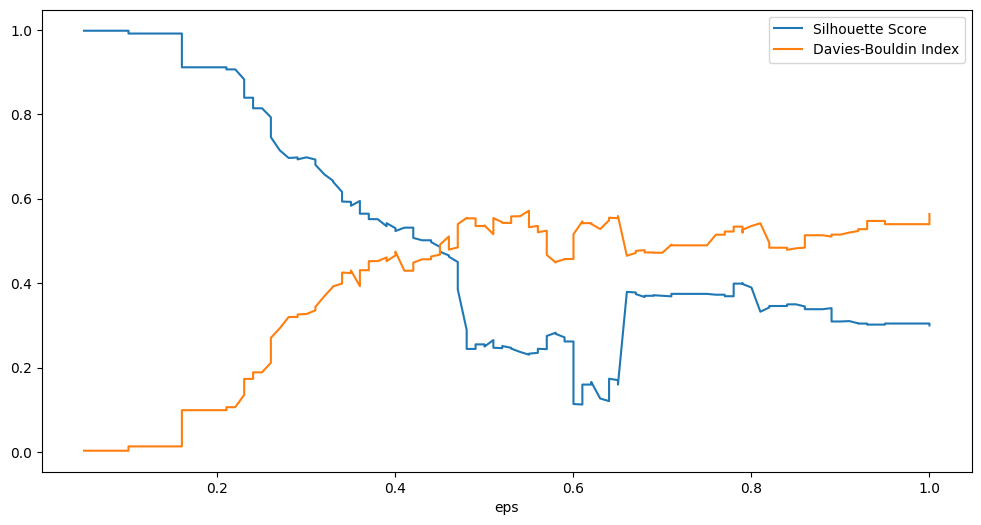

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2008
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2008-12-01 to 2009-02-28
Columns: 266 entries, 10000009 to 25000592
dtypes: float64(266)
memory usage: 187.7 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-12-01  1.043750  2.160118  1.478814  0.831316  1.125814  1.328185   
2008-12-02  1.045266  2.106869  1.526957  0.795462  1.092734  1.291240   
2008-12-03  1.088525  2.072716  1.666210  0.822523  1.184072  1.334042   
2008-12-04  1.038201  2.029759  1.590579  0.740242  1.060486  1.342223   
2008-12-05  0.998013  2.003682  1.627973  0.779075  1.087151  1.338546   
...              ...       ...       ...       ...       ...       ...   
2009-02-24  1.173201  1.538493  1.725527  0.875030  1.164426  1.463343   
2009-02-25  1.083297  1.540886  1.627195  0.856078  1.135085  1.362574   
2009-02-26  1.078403  1.532465  1.427271  0.814355  1.079530  1.231202   
2009-02-27  1.030707  1.543312  1.280363  0.729053  1.014236  1.497505   
2009-02-28  0.938234  1.516750  1.194346  0.662881  0.954251  1.406995   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-12-01  1.001160  0.652356  

          2008-12-01  2008-12-02  2008-12-03  2008-12-04  2008-12-05  \
10000009   -0.067683   -0.088180   -0.085799   -0.085262   -0.093702   
11000011    0.016188   -0.008232   -0.011391   -0.010093   -0.017537   
11000016   -0.034997   -0.051904   -0.042124   -0.043387   -0.045992   
13000011   -0.083643   -0.106992   -0.105910   -0.107850   -0.110284   
13000019   -0.061518   -0.084605   -0.078576   -0.083572   -0.086951   
...              ...         ...         ...         ...         ...   
7000003    -0.044127   -0.065325   -0.077167   -0.083684   -0.074038   
8000001    -0.047023   -0.061457   -0.066956   -0.071169   -0.069238   
9000001    -0.000668   -0.012876   -0.000944   -0.000454   -0.000651   
9000015    -0.006920   -0.019850   -0.009020   -0.008201   -0.008844   
25000592   -0.020758   -0.047720   -0.052129   -0.050058   -0.052633   

          2008-12-06  2008-12-07  2008-12-08  2008-12-09  2008-12-10  ...  \
10000009   -0.087524   -0.087682   -0.086017   -0.090822  

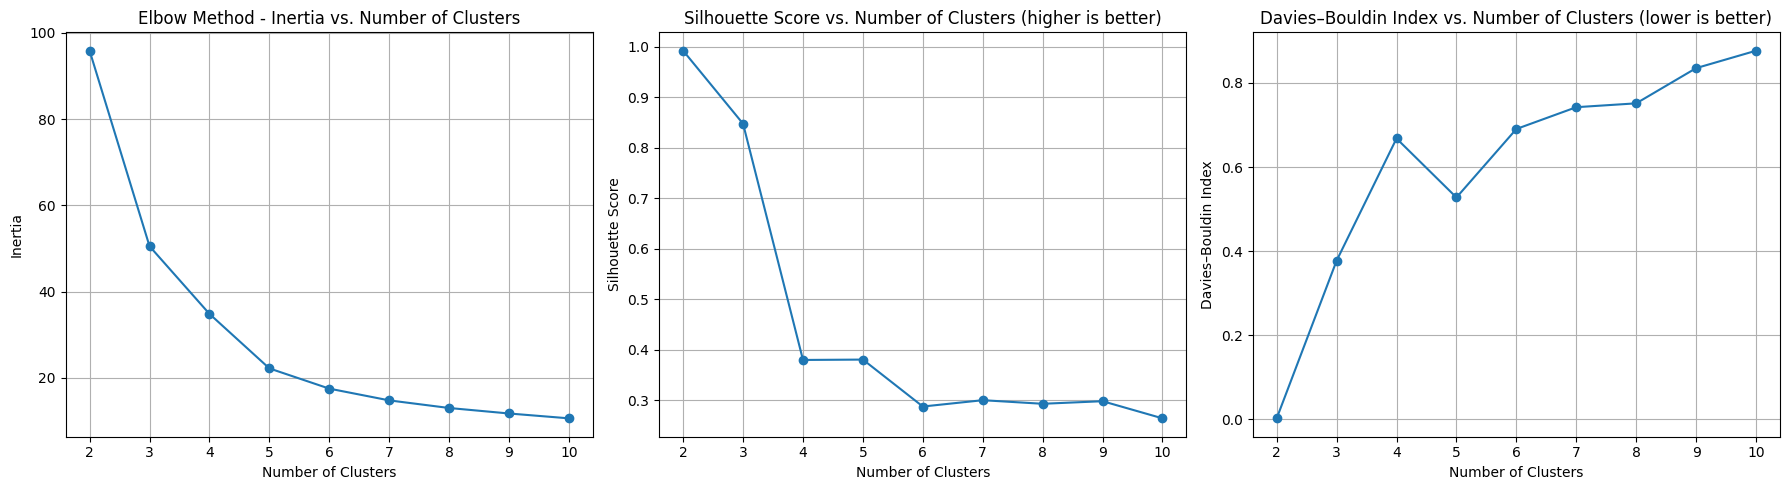

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2008-12-01  1.043750  2.160118  1.478814  0.831316  1.125814  1.328185   
2008-12-02  1.045266  2.106869  1.526957  0.795462  1.092734  1.291240   
2008-12-03  1.088525  2.072716  1.666210  0.822523  1.184072  1.334042   
2008-12-04  1.038201  2.029759  1.590579  0.740242  1.060486  1.342223   
2008-12-05  0.998013  2.003682  1.627973  0.779075  1.087151  1.338546   
...              ...       ...       ...       ...       ...       ...   
2009-02-24  1.173201  1.538493  1.725527  0.875030  1.164426  1.463343   
2009-02-25  1.083297  1.540886  1.627195  0.856078  1.135085  1.362574   
2009-02-26  1.078403  1.532465  1.427271  0.814355  1.079530  1.231202   
2009-02-27  1.030707  1.543312  1.280363  0.729053  1.014236  1.497505   
2009-02-28  0.938234  1.516750  1.194346  0.662881  0.954251  1.406995   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-12-01  1.001160  0.652356  

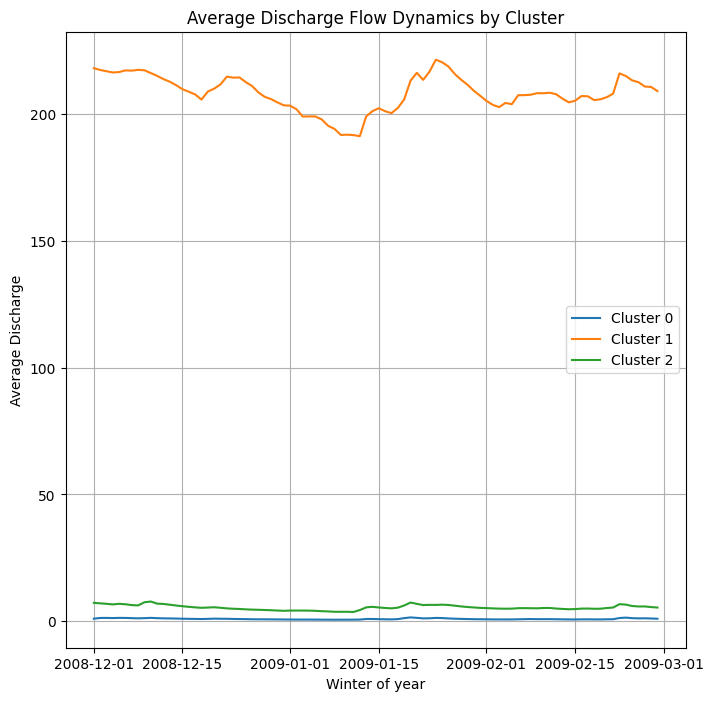

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2008-12-01  1.043750  2.160118  1.478814  0.831316  1.125814  1.328185   
2008-12-02  1.045266  2.106869  1.526957  0.795462  1.092734  1.291240   
2008-12-03  1.088525  2.072716  1.666210  0.822523  1.184072  1.334042   
2008-12-04  1.038201  2.029759  1.590579  0.740242  1.060486  1.342223   
2008-12-05  0.998013  2.003682  1.627973  0.779075  1.087151  1.338546   
...              ...       ...       ...       ...       ...       ...   
2009-02-24  1.173201  1.538493  1.725527  0.875030  1.164426  1.463343   
2009-02-25  1.083297  1.540886  1.627195  0.856078  1.135085  1.362574   
2009-02-26  1.078403  1.532465  1.427271  0.814355  1.079530  1.231202   
2009-02-27  1.030707  1.543312  1.280363  0.729053  1.014236  1.497505   
2009-02-28  0.938234  1.516750  1.194346  0.662881  0.954251  1.406995   

            14000016  14000020  14000022  15000002  ...  64000025  66000014  \
2008-12-01  1.001160  0.652356  1.040843  0.911370  ...  0.449481  0.566542   
2008-12-02  0.988126  0.602846  1.021608  0.863556  ...  0.543945  0.914782   
2008-12-03  0.960127  0.597182  1.001314  0.821180  ...  0.753493  1.422280   
2008-12-04  0.937846  0.574764  0.984958  0.779418  ...  0.845689  1.942708   
2008-12-05  0.967511  0.599538  1.021228  0.811156  ...  0.922822  2.241776   
...              ...       ...       ...       ...  ...       ...       ...   
2009-02-24  1.075373  0.652416  1.055235  0.840886  ...  1.118573  2.650374   
2009-02-25  1.021336  0.654685  0.998120  0.813478  ...  1.124684  2.647186   
2009-02-26  1.029857  0.676945  1.010521  0.801747  ...  1.127730  3.789873   
2009-02-27  1.029003  0.657465  1.029652  0.767058  ...  1.147440  2.986786   
2009-02-28  0.975710  0.631964  0.976187  0.719505  ...  1.137836  2.154129   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2008-12-01  0.570777  0.797338  1.284969  1.357292  1.318739  1.935759   
2008-12-02  0.989762  1.240304  1.940861  1.348749  1.400111  2.045201   
2008-12-03  1.536760  1.258023  2.796988  1.202710  1.337763  2.210901   
2008-12-04  2.044368  1.275741  3.419821  1.059010  1.224093  2.156903   
2008-12-05  2.325729  6.024334  3.702029  1.257660  1.321033  2.226647   
...              ...       ...       ...       ...       ...       ...   
2009-02-24  3.289854  2.932423  4.186201  1.540319  1.468488  1.829736   
2009-02-25  2.815388  4.073409  3.615229  1.457325  1.401519  1.732507   
2009-02-26  3.609086  6.940799  4.570364  1.541327  1.476208  1.711952   
2009-02-27  3.173088  4.629201  4.045684  1.392966  1.352281  1.684589   
2009-02-28  2.399826  3.013987  3.115142  1.162106  1.155481  1.627737   

             9000015  25000592  
2008-12-01  1.852530  1.668340  
2008-12-02  1.952588  1.582513  
2008-12-03  2.104080  1.533884  
2008-12-04  2.054711  1.502573  
2008-12-05  2.118475  1.540291  
...              ...       ...  
2009-02-24  1.755598  1.245154  
2009-02-25  1.666707  1.266298  
2009-02-26  1.647913  1.348595  
2009-02-27  1.622897  1.308883  
2009-02-28  1.570920  1.273999  

[90 rows x 266 columns]

<Axes: >

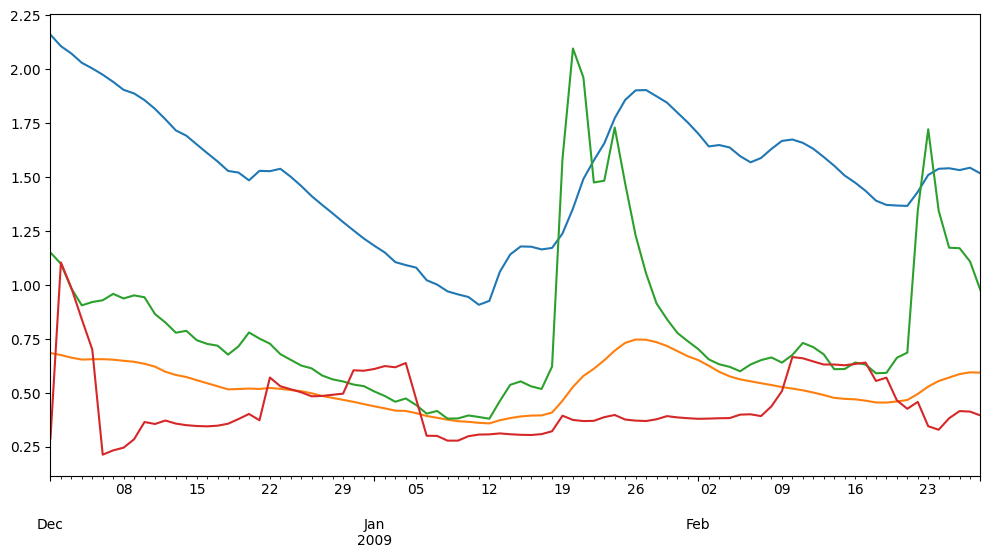

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

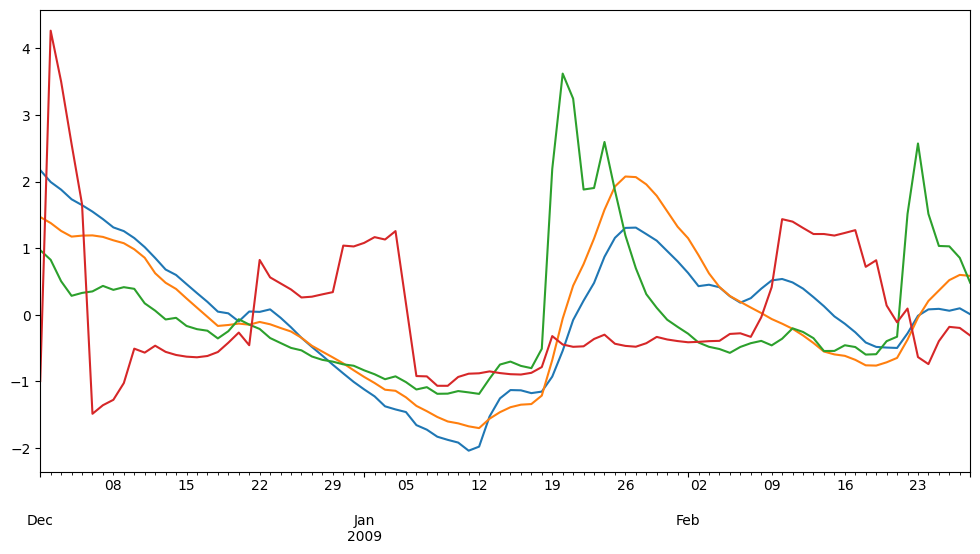

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

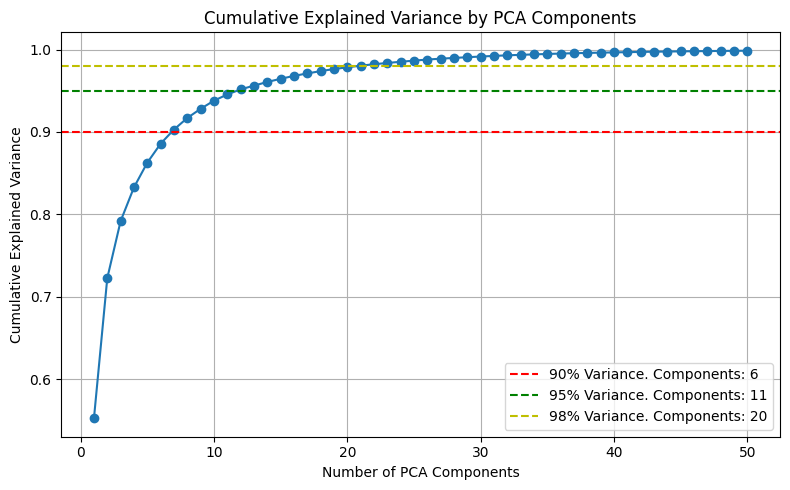

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 10.16048985,   1.99714438,   6.87142533, ...,   1.4133595 ,
         -0.8217013 ,   0.9078465 ],
       [ 16.42923256, -10.47426953,   6.75731806, ...,  -0.48692627,
          0.13504224,  -0.4982686 ],
       [ 16.91832144, -14.67044639,   4.69539524, ...,   0.38228402,
          0.24546295,   0.79120536],
       ...,
       [  9.19404325,  -3.17142541,  -9.15717267, ...,   1.33481209,
          0.09807583,  -0.15377021],
       [  5.90929147,  -3.09704568,  -9.01336924, ...,   1.73226473,
         -0.34060558,   1.08797056],
       [  1.53242088,  -2.90314274,  -8.06155518, ...,   1.67774778,
         -0.47254965,   0.98514405]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


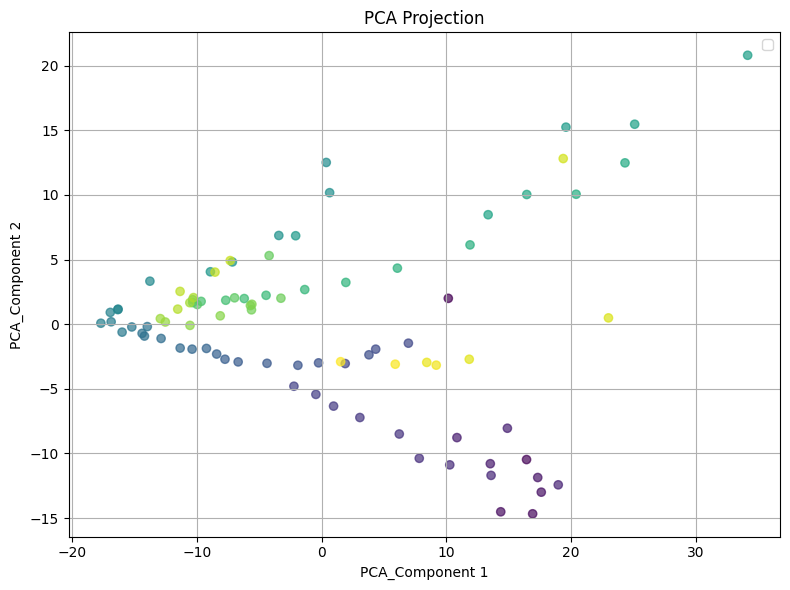

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_59116\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


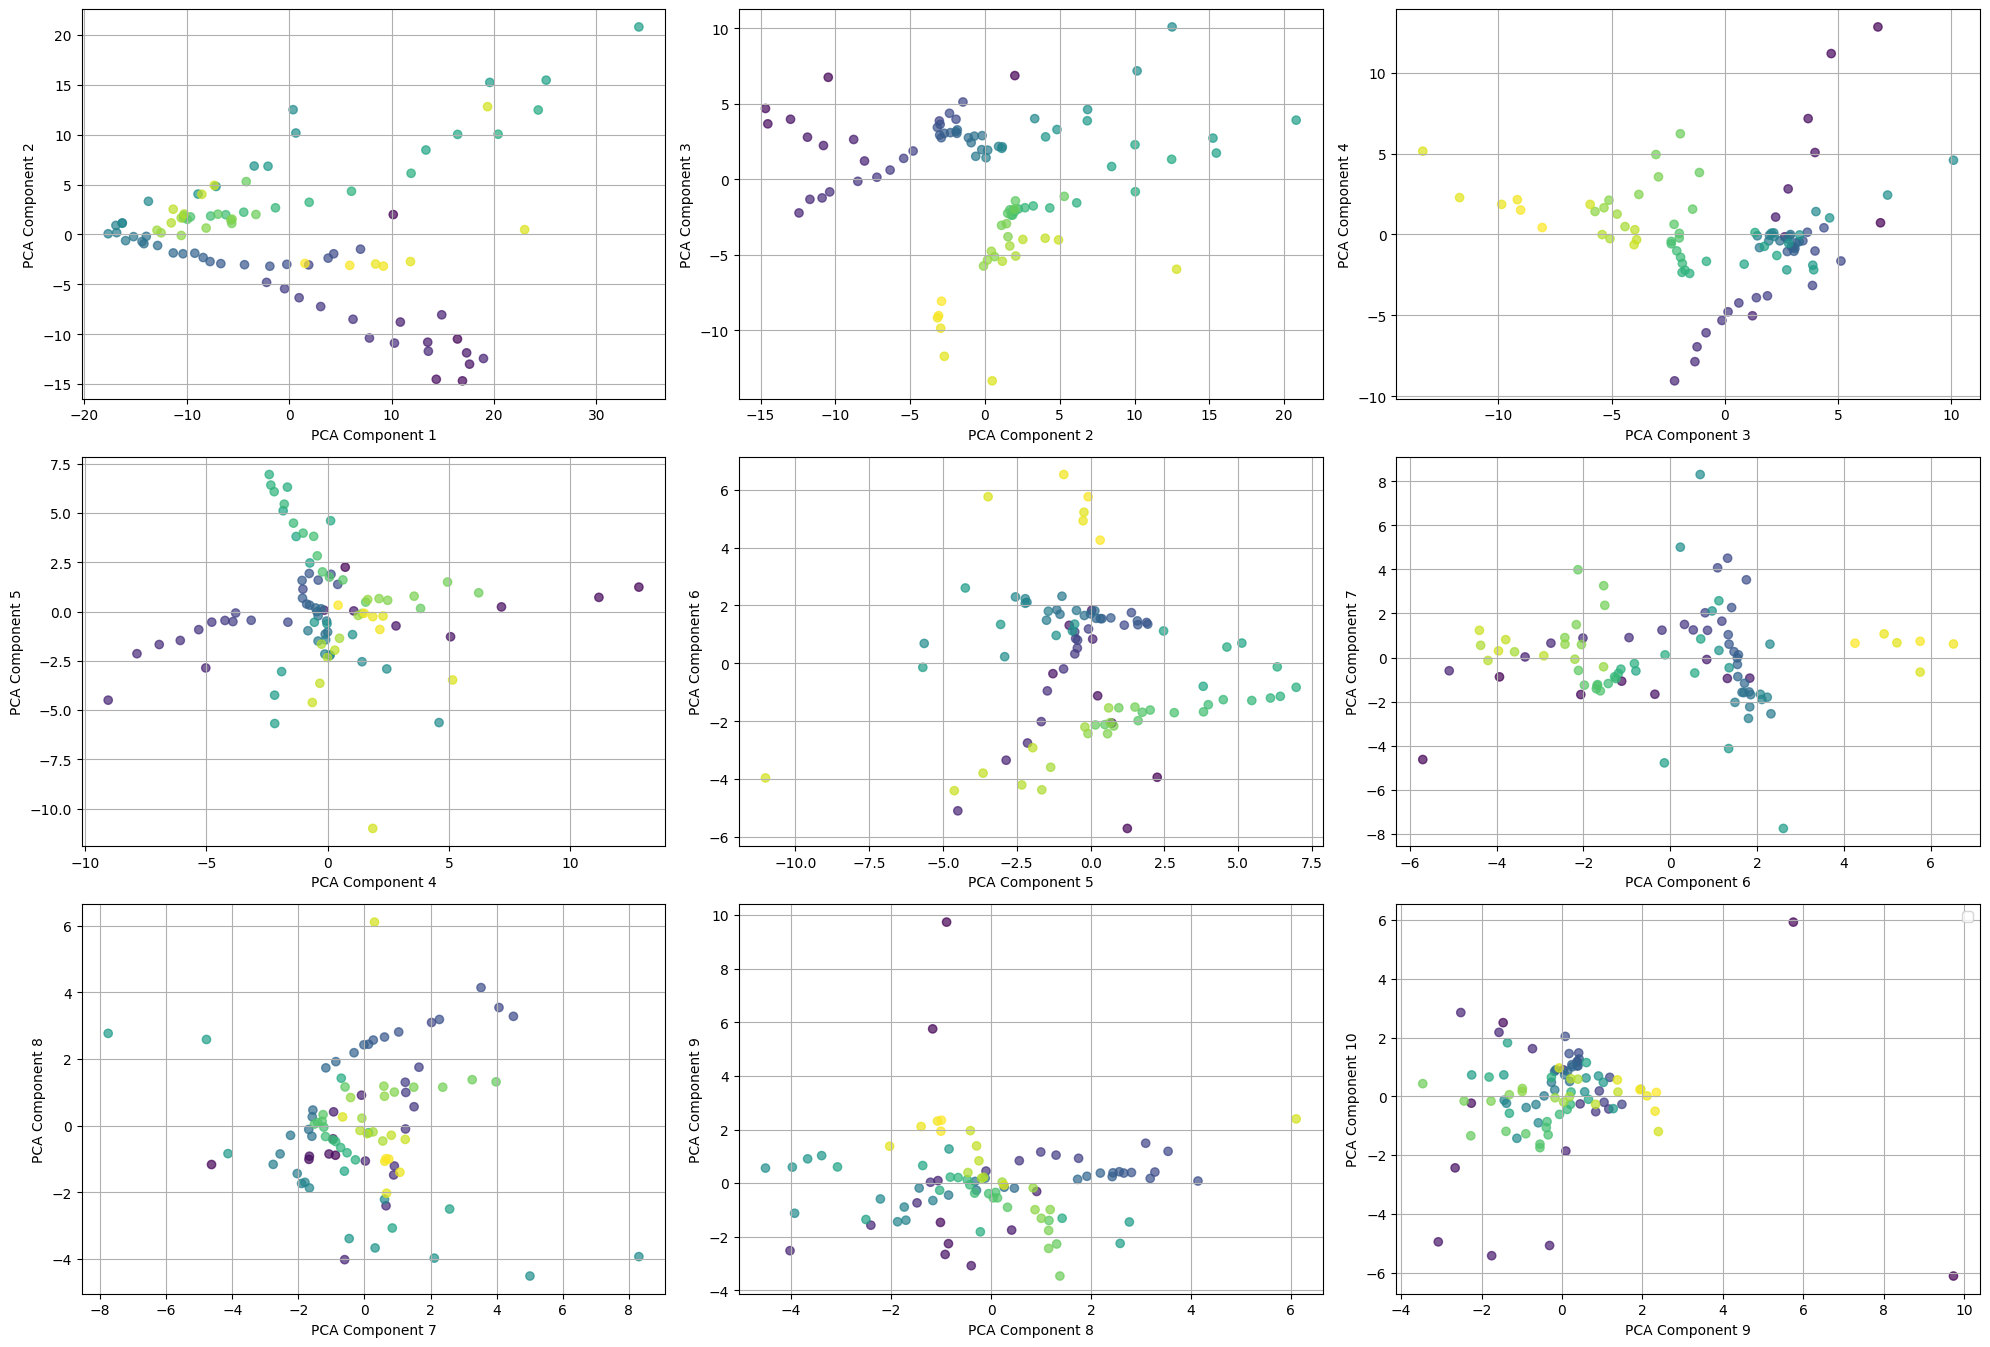

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.317
KMeans Davies-Bouldin Index is 1.240


<Axes: xlabel='k'>

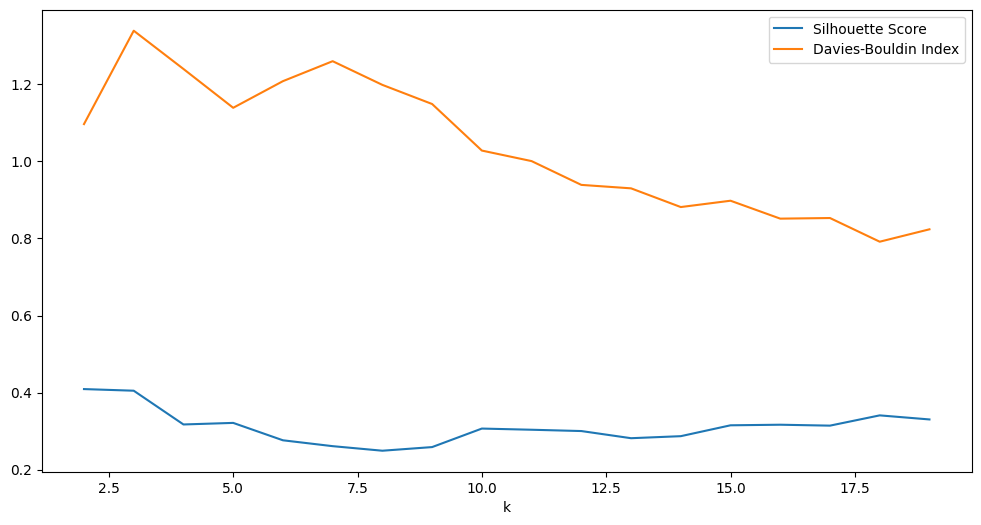

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         0     90               NaN   
3    1.27            3         1     87               NaN   
4    1.52            3         2     84         -0.185465   
5    1.78            3         4     75         -0.106002   
6    2.03            3         4     74         -0.099019   
7    2.29            3         5     70         -0.085914   
8    2.54            3         5     64         -0.085354   
9    2.80            3         5     60         -0.068542   
10   3.05            3         5     53         -0.029584   
11   3.31            3         5     53         -0.029584   
12   3.56            3         5     50         -0.015167   
13   3.82            3         6     45          0.007688   
14   4.07            3         5     43          0.055608   
15   4.33            3         6     37          0.090668   
16   4.58            3         7     32          0.094939   
17   4.84            3         7     31          0.098927   
18   5.09            3         6     26          0.153387   
19   5.35            3         6     21          0.167050   
20   5.60            3         6     20          0.173473   
21   5.86            3         6     19          0.183925   
22   6.11            3         5     19          0.107449   
23   6.37            3         5     18          0.094209   
24   6.62            3         5     16          0.123902   
25   6.88            3         5     16          0.123902   
26   7.13            3         5     14          0.089506   
27   7.39            3         5     13          0.157306   
28   7.64            3         5     13          0.157306   
29   7.90            3         5     13          0.157306   
30   8.15            3         5     13          0.157306   
31   8.41            3         3     12          0.250727   
32   8.66            3         3     12          0.250727   
33   8.92            3         3     12          0.250727   
34   9.17            3         3      9          0.217803   
35   9.43            3         3      7          0.225994   
36   9.68            3         3      7          0.225994   
37   9.94            3         3      7          0.225994   
38  10.19            3         2      7          0.158124   
39  10.45            3         2      7          0.158124   
40  10.70            3         2      7          0.158124   
41  10.96            3         2      7          0.158124   
42  11.21            3         2      7          0.158124   
43  11.47            3         2      7          0.158124   
44  11.72            3         2      7          0.158124   
45  11.98            3         2      7          0.158124   
46  12.23            3         2      7          0.158124   
47  12.49            3         2      7          0.158124   
48  12.74            3         1      6               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.253179  
5               1.108788  
6               1.126521  
7               1.223290  
8               1.369172  
9               1.481836  
10              1.390370  
11              1.390370  
12              1.411403  
13              1.347069  
14              1.409812  
15              1.365593  
16              1.514862  
17              1.531261  
18              1.548160  
19              1.430495  
20              1.421973  
21              1.375776  
22              1.488246  
23              1.529571  
24              1.456432  
25              1.456432  
26              1.546411  
27              1.548162  
28              1.548162  
29              1.548162  
30              1.548162  
31              1.188798  
32 

<Axes: xlabel='eps'>

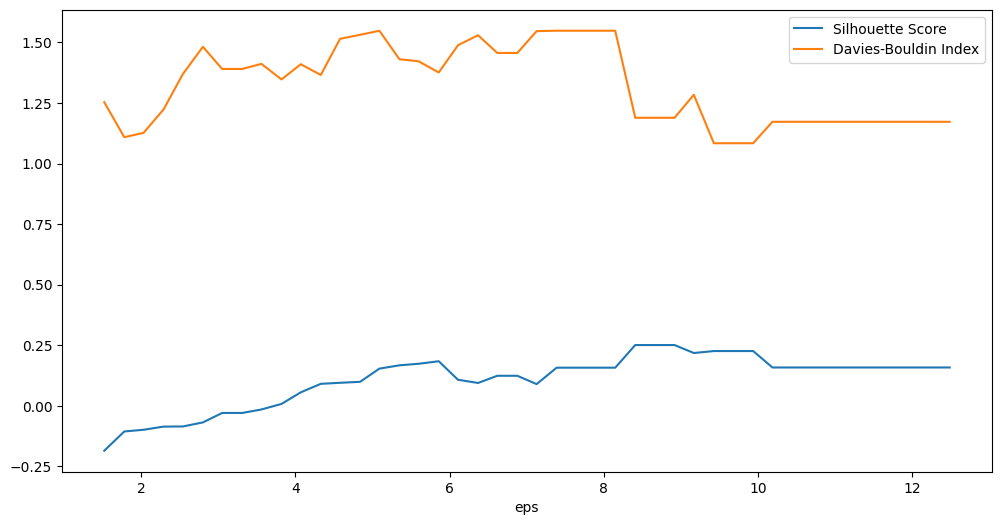

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

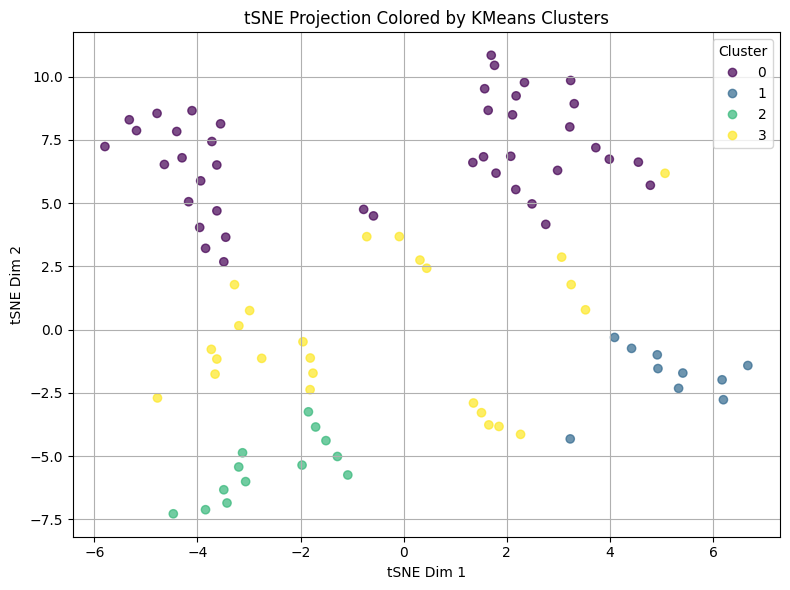

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        26    154          0.412014   
1    0.05            2        28    139          0.360727   
2    0.06            2        26    121          0.228159   
3    0.06            2        27    105          0.177994   
4    0.07            2        24     90         -0.023036   
..    ...          ...       ...    ...               ...   
195  0.98            2         1      2               NaN   
196  0.99            2         1      2               NaN   
197  0.99            2         1      2               NaN   
198  1.00            2         1      2               NaN   
199  1.00            2         1      2               NaN   

     Davies-Bouldin Index  
0                0.595081  
1                0.621499  
2                0.691872  
3                0.733911  
4                0.845880  
..                    ...  
195                   NaN  
196                   NaN  
197                   NaN  
198                   NaN  
199                   NaN  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

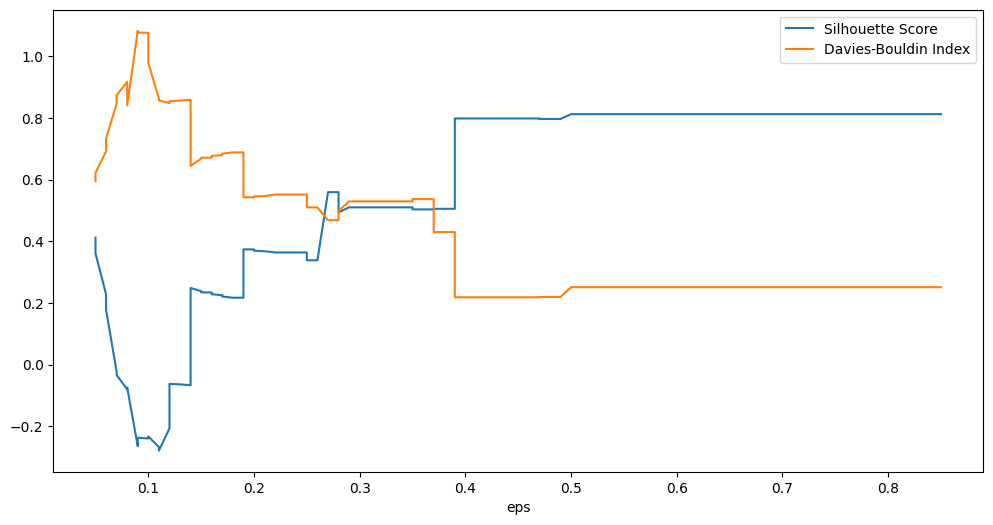

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))